In [12]:
import pandas as pd
import os
# from src.data_processor.phase_2.prob1.v1 import Phase2Prob1FeatureProcessor
# from src.data_processor.phase_2.prob2.v1 import Phase2Prob2FeatureProcessor
# from src.model_predictor import \
#     (Phase1Prob1ModelPredictor, Phase1Prob2ModelPredictor, Phase2Prob1ModelPredictor, Phase2Prob2ModelPredictor)
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import matplotlib.pyplot as plt
from src.data_processor.phase_2.prob1.v13 import Phase2Prob1FeatureProcessor
from src.data_processor.phase_2.prob2.v2 import Phase2Prob2FeatureProcessor
from src.model_predictor import \
    (Phase1Prob1ModelPredictor, Phase1Prob2ModelPredictor, Phase2Prob1ModelPredictor, Phase2Prob2ModelPredictor)


In [13]:
phase2_prob1_pretrained_model = Phase2Prob1ModelPredictor.from_pretrained('../checkpoints/phase-2/prob-1/v1.pkl')
phase2_prob1_feature_processor = Phase2Prob1FeatureProcessor()

In [14]:
DIR = 'D:/Workspace/test_phase2_prob1/'
files = os.listdir(DIR)


In [15]:
train_df = pd.read_parquet("D:/Data/MLOPS_2023/data_phase-2/phase-2/prob-1/raw_train.parquet")


In [16]:
dfs = []
predictions = []
for file in files:
    df = pd.read_csv(DIR+file)
    dfs.append(df)
    data = phase2_prob1_feature_processor.transform(df)
    prediction = phase2_prob1_pretrained_model.predict_proba(data)
    predictions.append(prediction)

In [17]:
means = []
stds = []
for p in predictions:
    means.append(np.mean(p))
    stds.append(np.std(p))

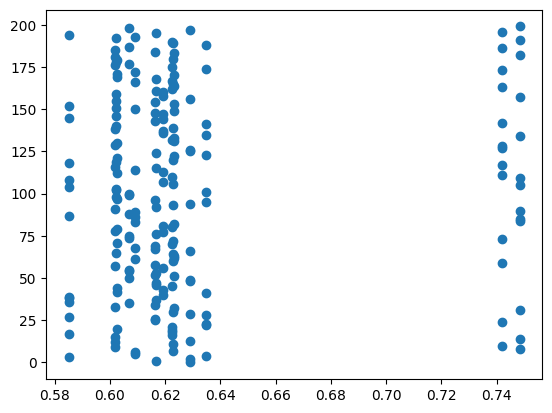

In [18]:
plt.scatter(x=means, y=np.arange(0, len(means)))

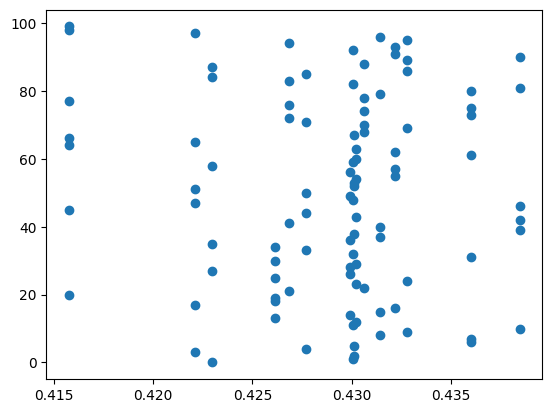

In [33]:
plt.scatter(x=stds, y=np.arange(0, len(means)))

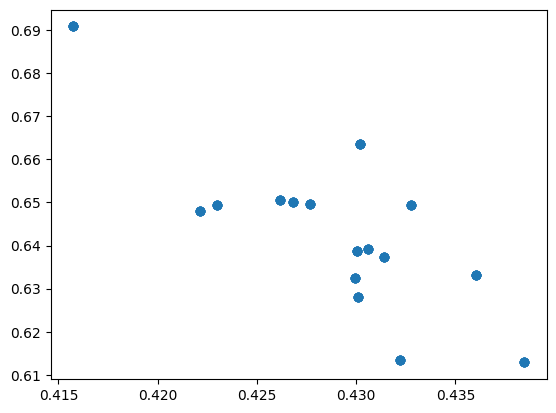

In [19]:
plt.scatter(x=stds, y=means)


In [25]:
[x for x in stds if x<0.420]

[0.4157401048479001,
 0.4157401048479001,
 0.4157401048479001,
 0.4157401048479001,
 0.4157401048479001,
 0.4157401048479001,
 0.4157401048479001]

In [ ]:
[x for x in means if x<0.420]

In [9]:
check_drift = {}
for col in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
            'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
            'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
            'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
            'feature22', 'feature23', 'feature24', 'feature25', 'feature26',
            'feature27', 'feature28', 'feature29', 'feature30', 'feature31',
            'feature32', 'feature33', 'feature34', 'feature35', 'feature36',
            'feature37', 'feature38', 'feature39', 'feature40', 'feature41']:
    if col not in ["feature2",
                   "feature3",
                   "feature4"]:
        print(col)
        mean_ = []
        std_ = []
        max_ = []
        min_ = []
        for df in dfs:
            mean_.append(df[col].mean())
            std_.append(df[col].std())
            max_.append(df[col].max())
            min_.append(df[col].min())
        check_drift[col] = pd.DataFrame({'mean_':mean_, 'std_':std_, 'max_': max_, 'min_':min_})

feature1
feature5
feature6
feature7
feature8
feature9
feature10
feature11
feature12
feature13
feature14
feature15
feature16
feature17
feature18
feature19
feature20
feature21
feature22
feature23
feature24
feature25
feature26
feature27
feature28
feature29
feature30
feature31
feature32
feature33
feature34
feature35
feature36
feature37
feature38
feature39
feature40
feature41


In [10]:
check_drift.keys()

dict_keys(['feature1', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34', 'feature35', 'feature36', 'feature37', 'feature38', 'feature39', 'feature40', 'feature41'])

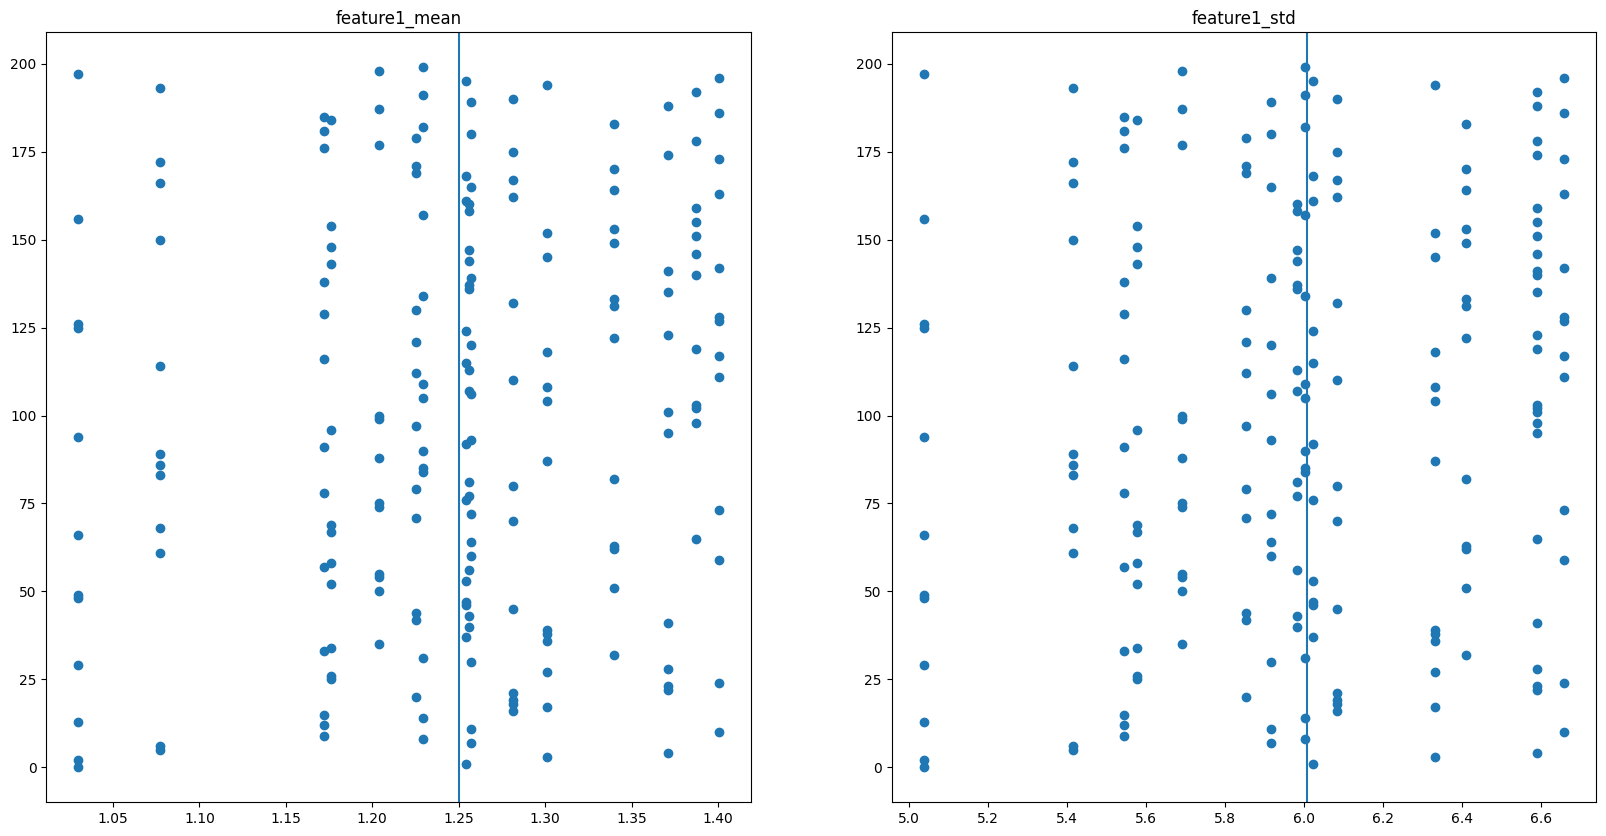

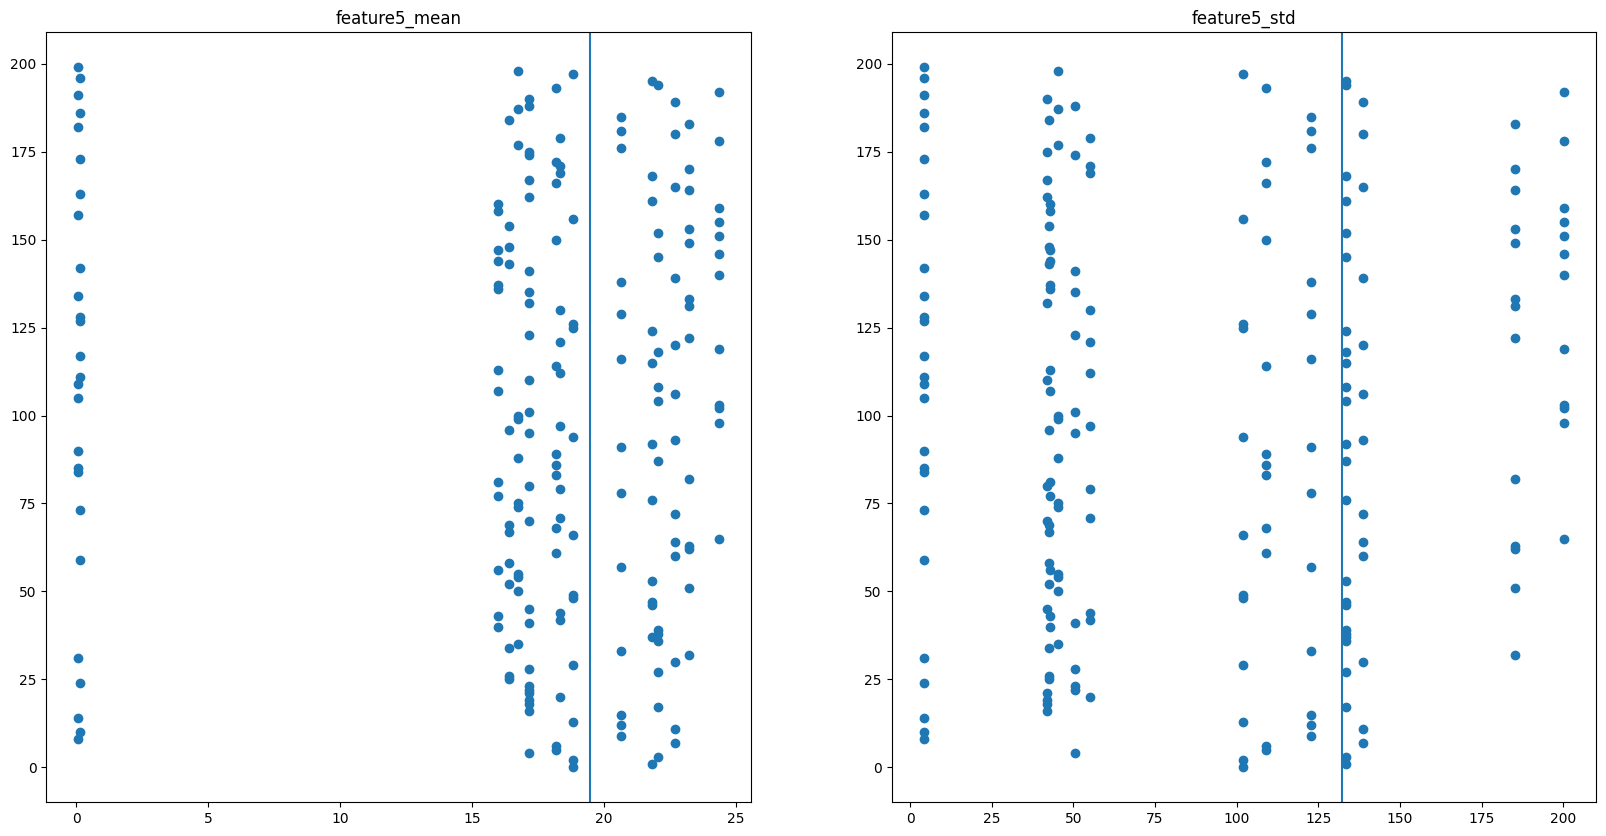

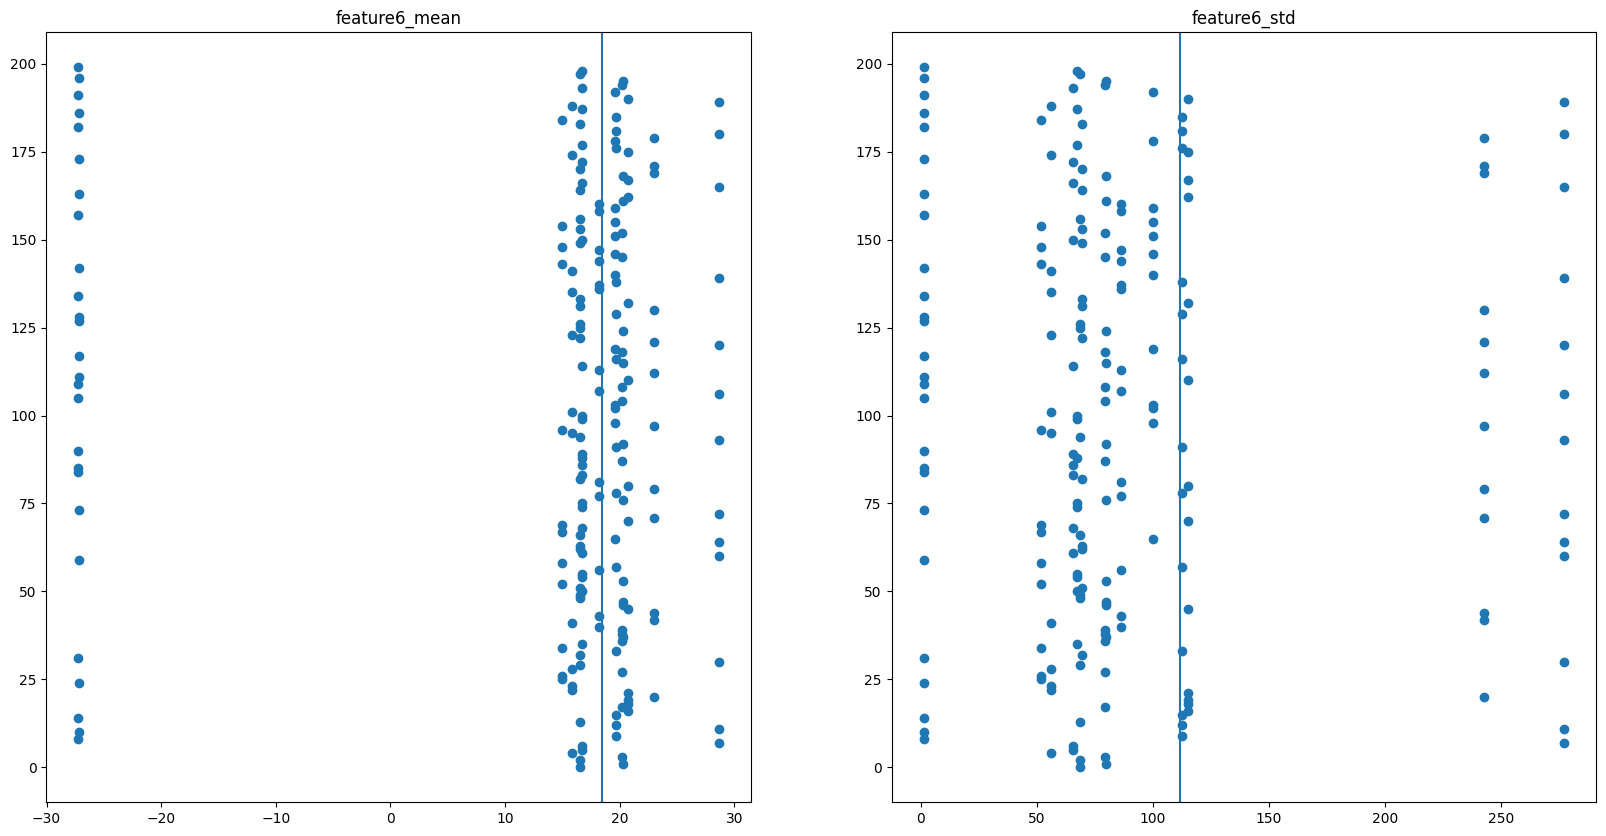

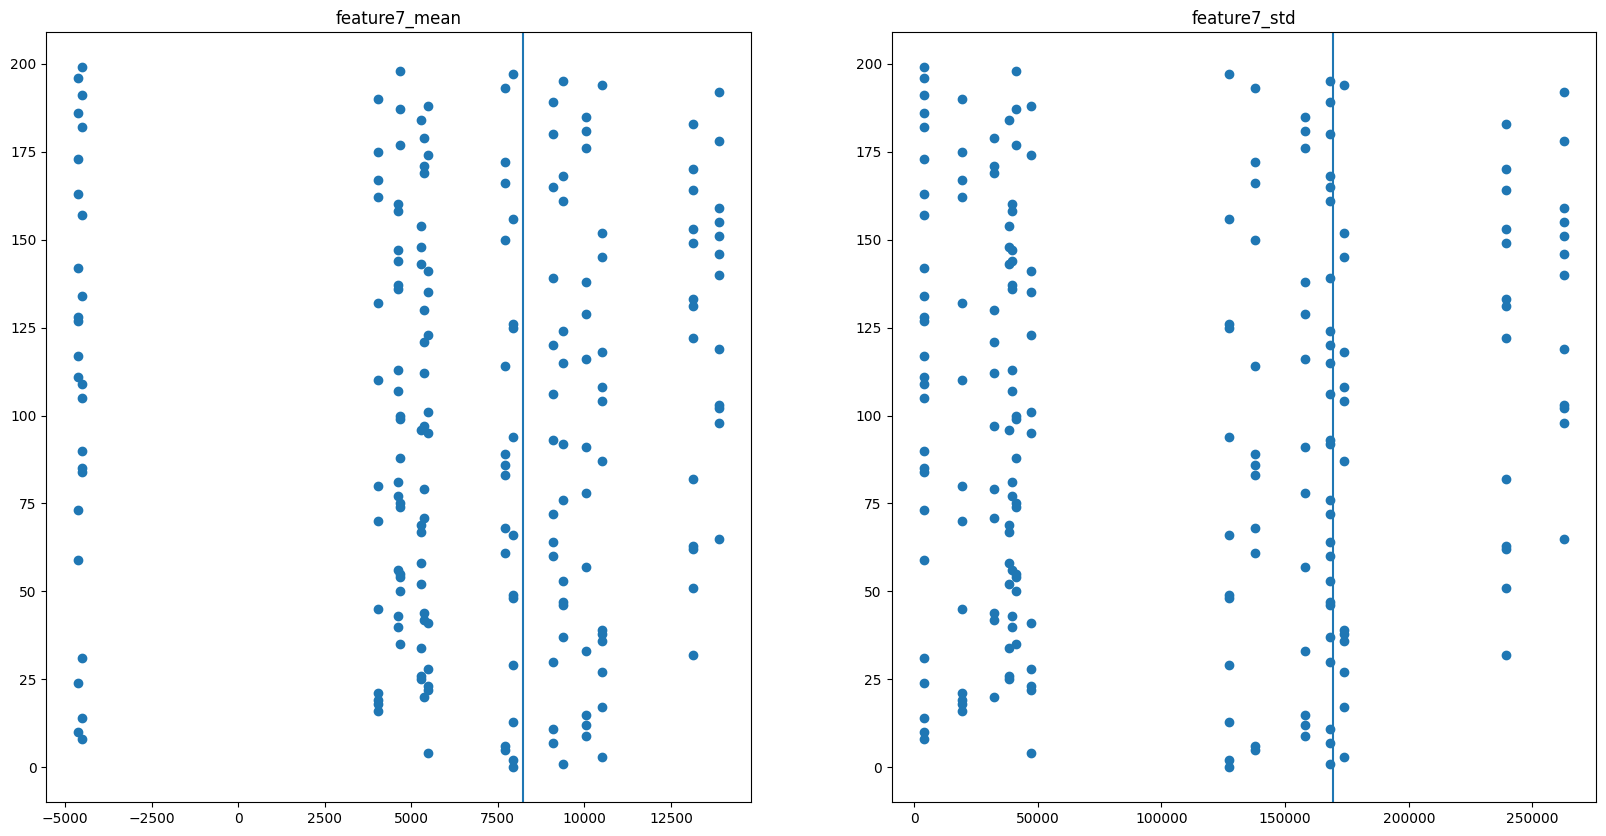

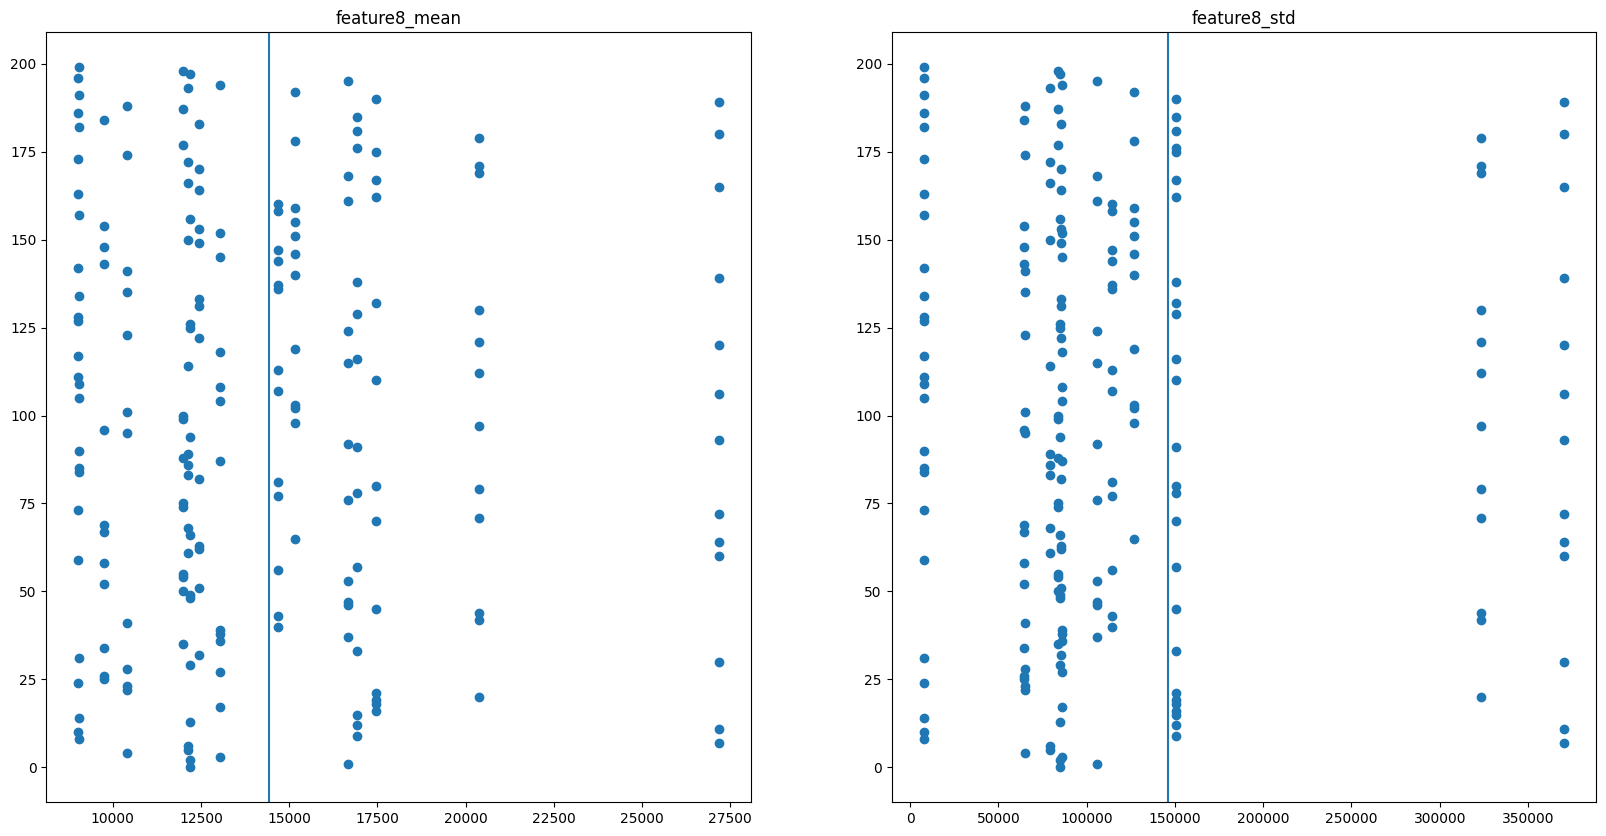

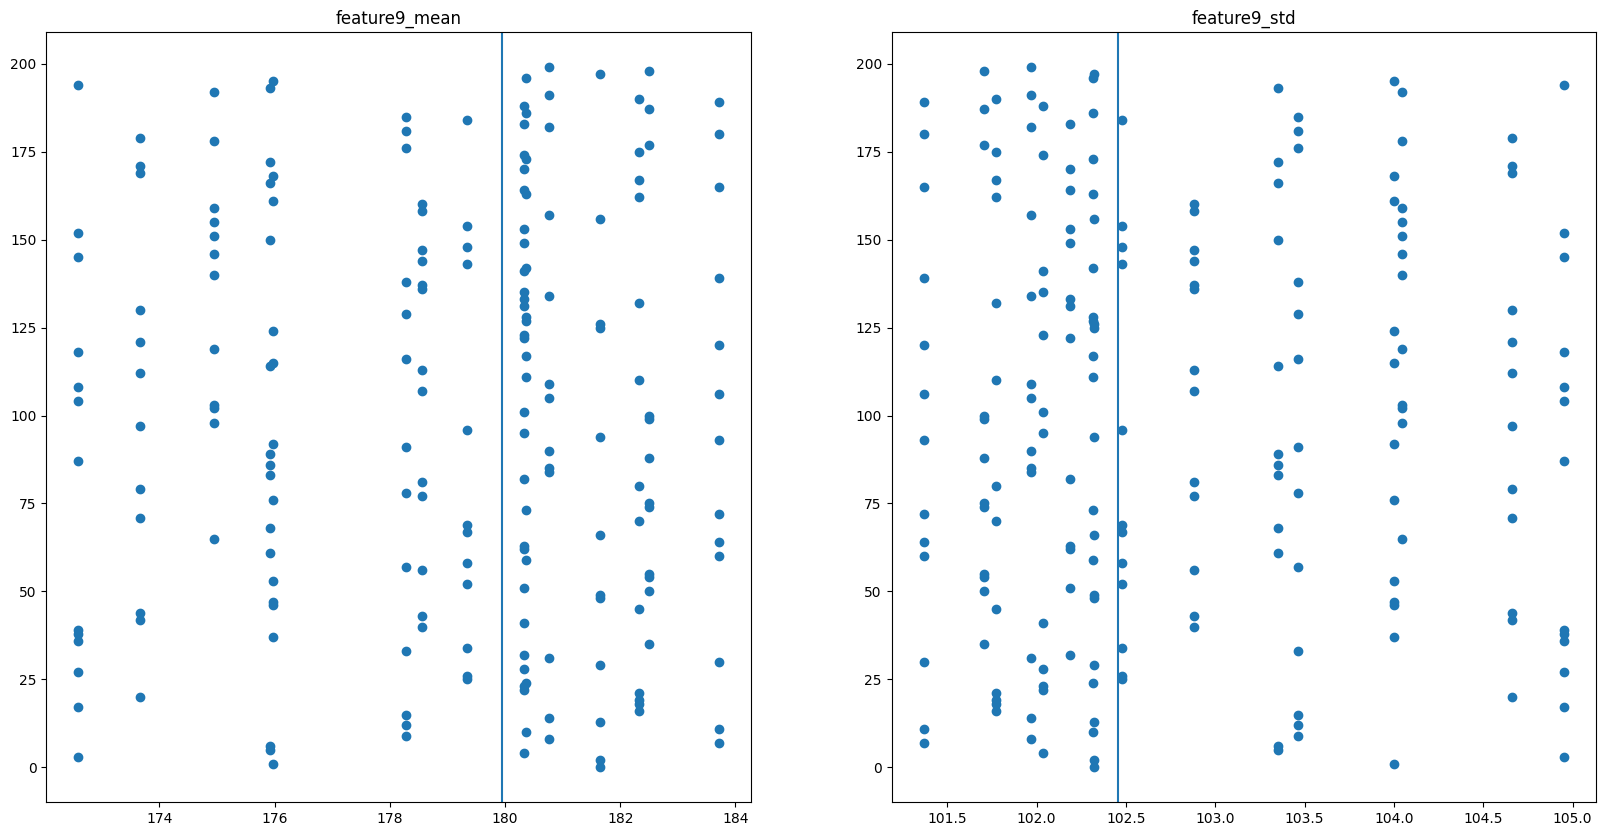

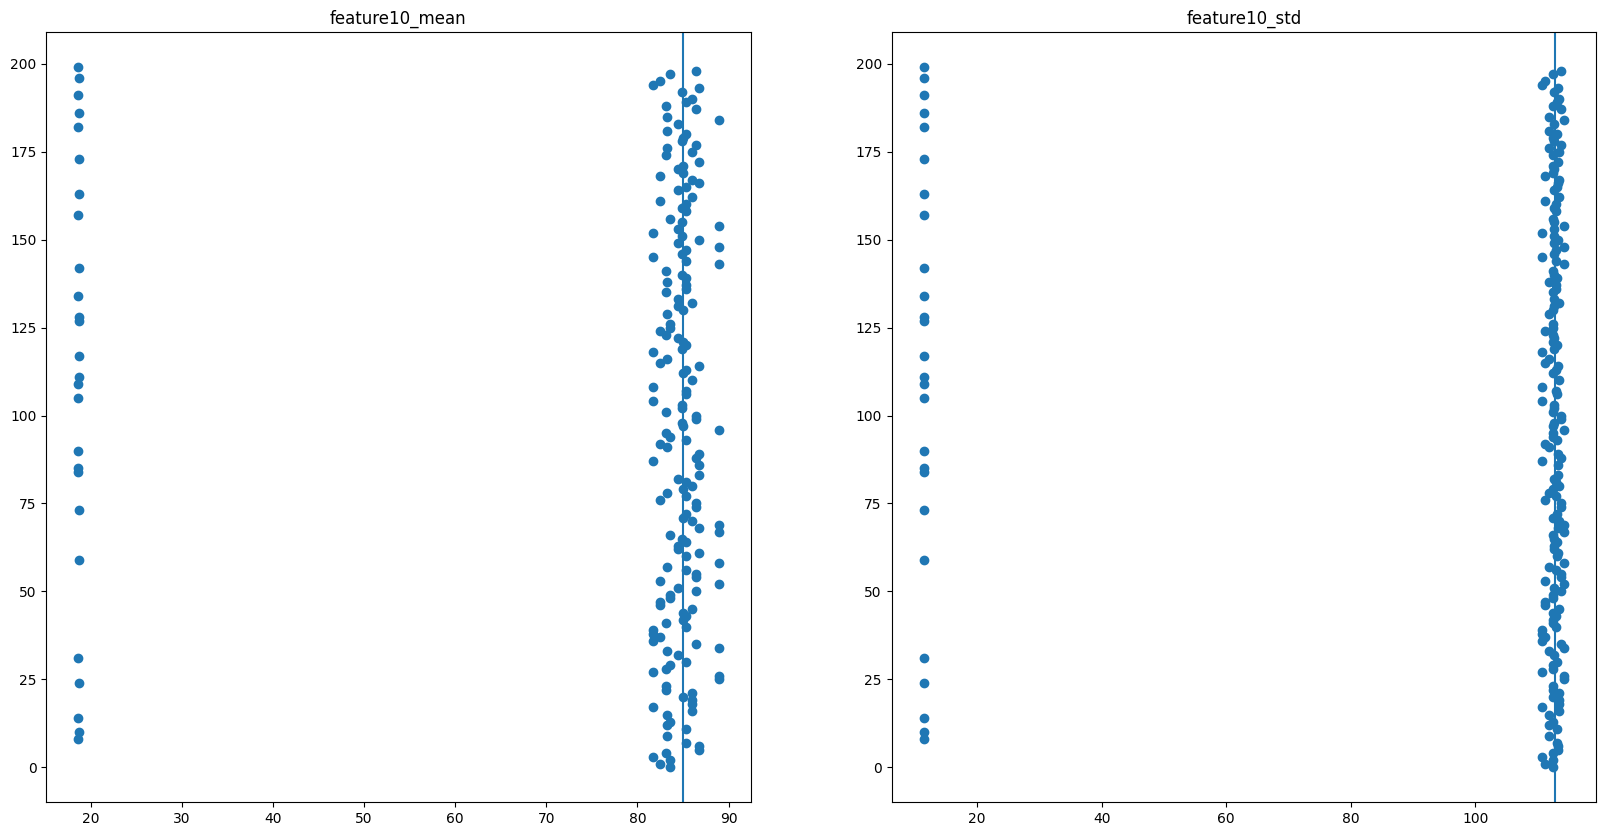

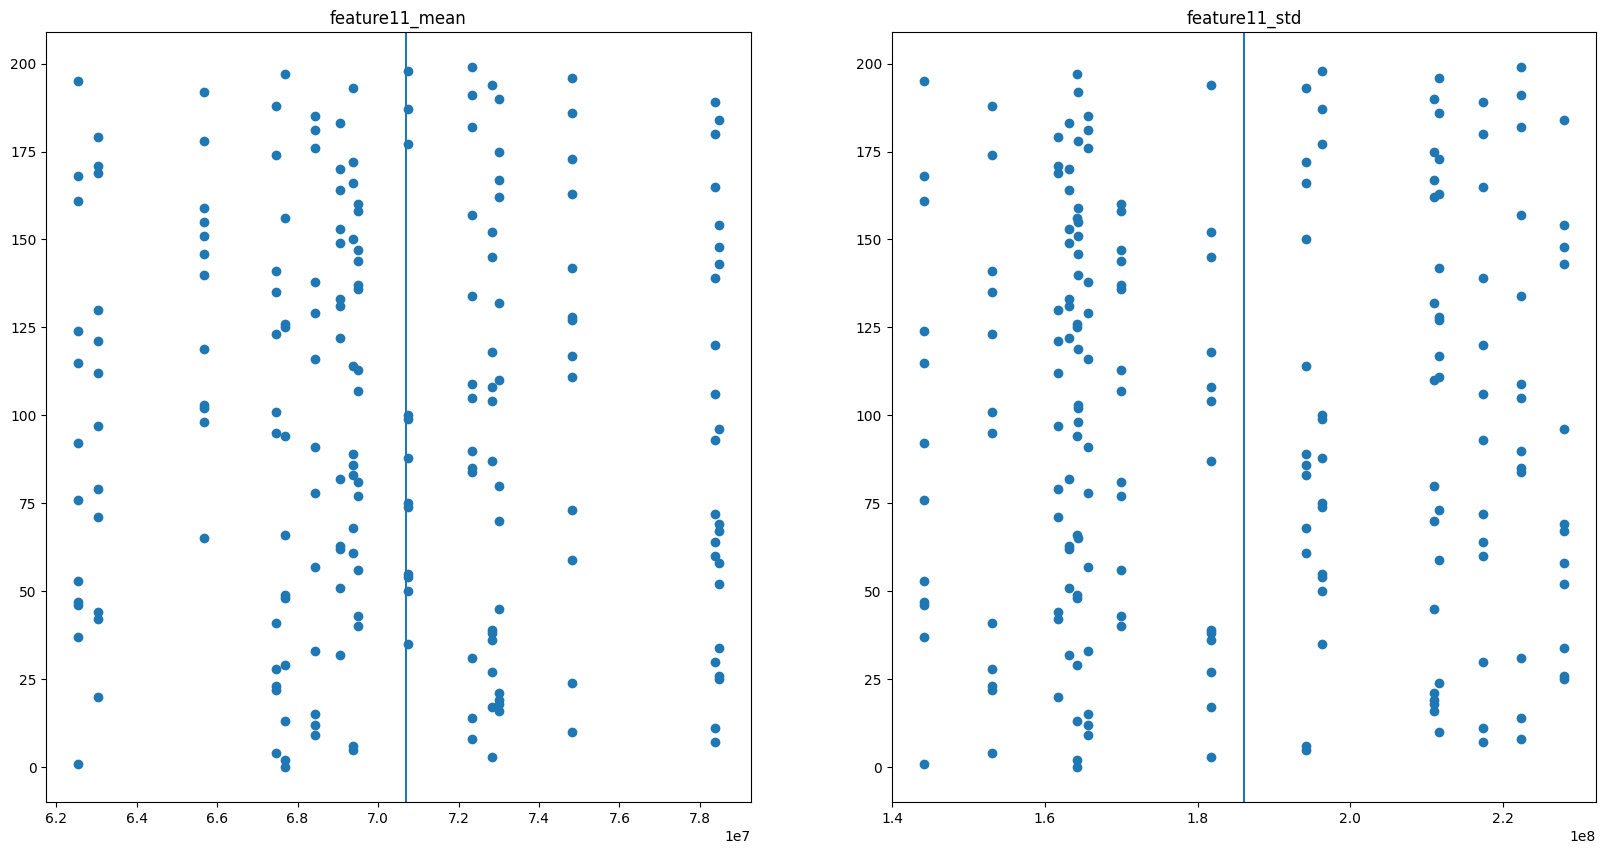

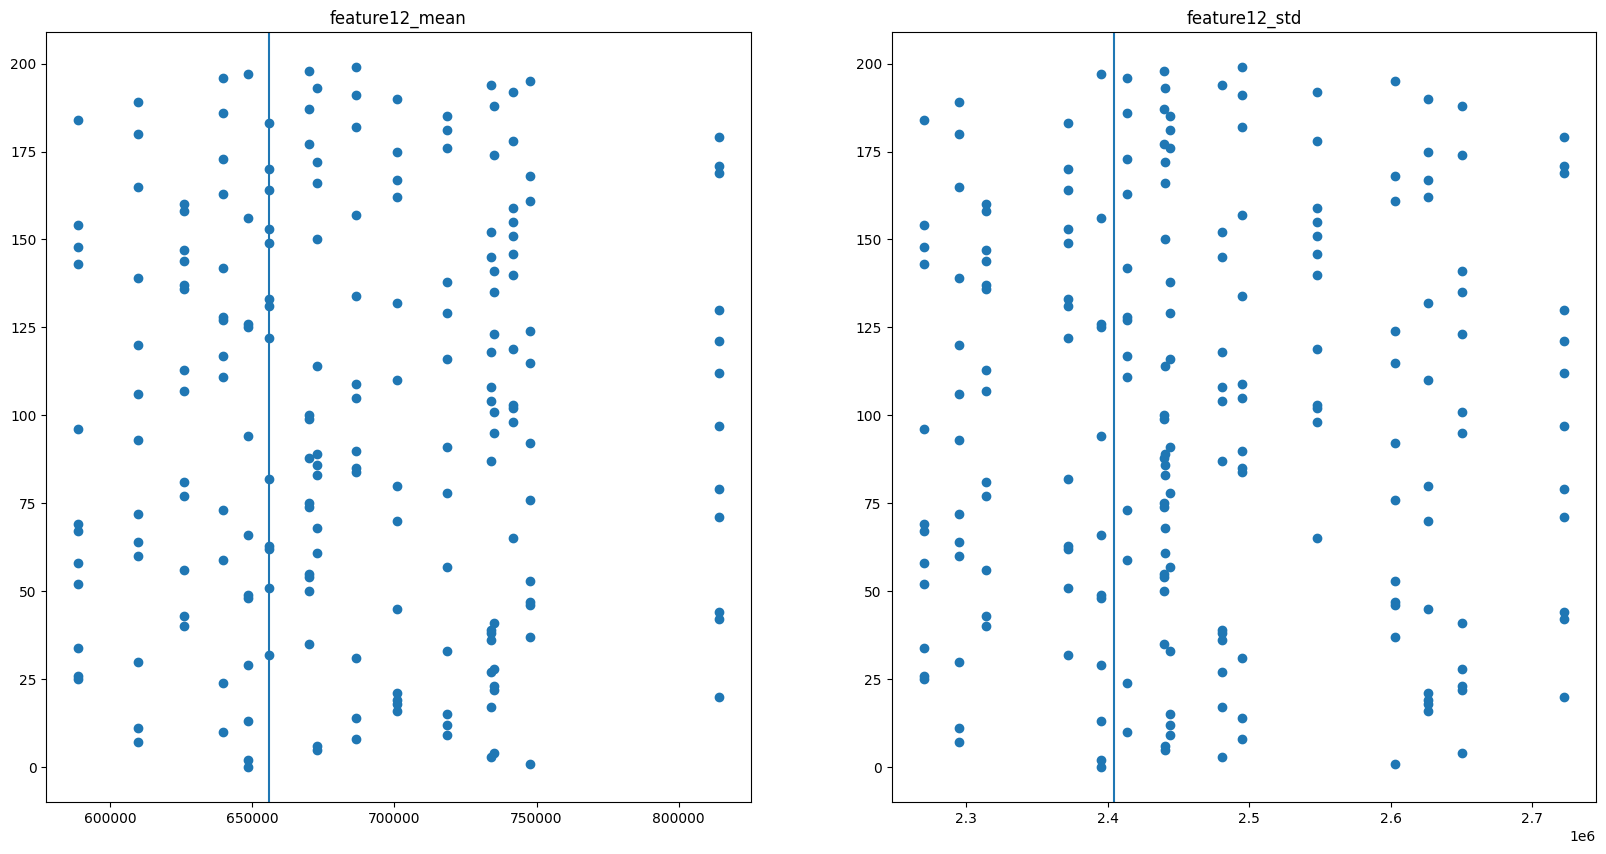

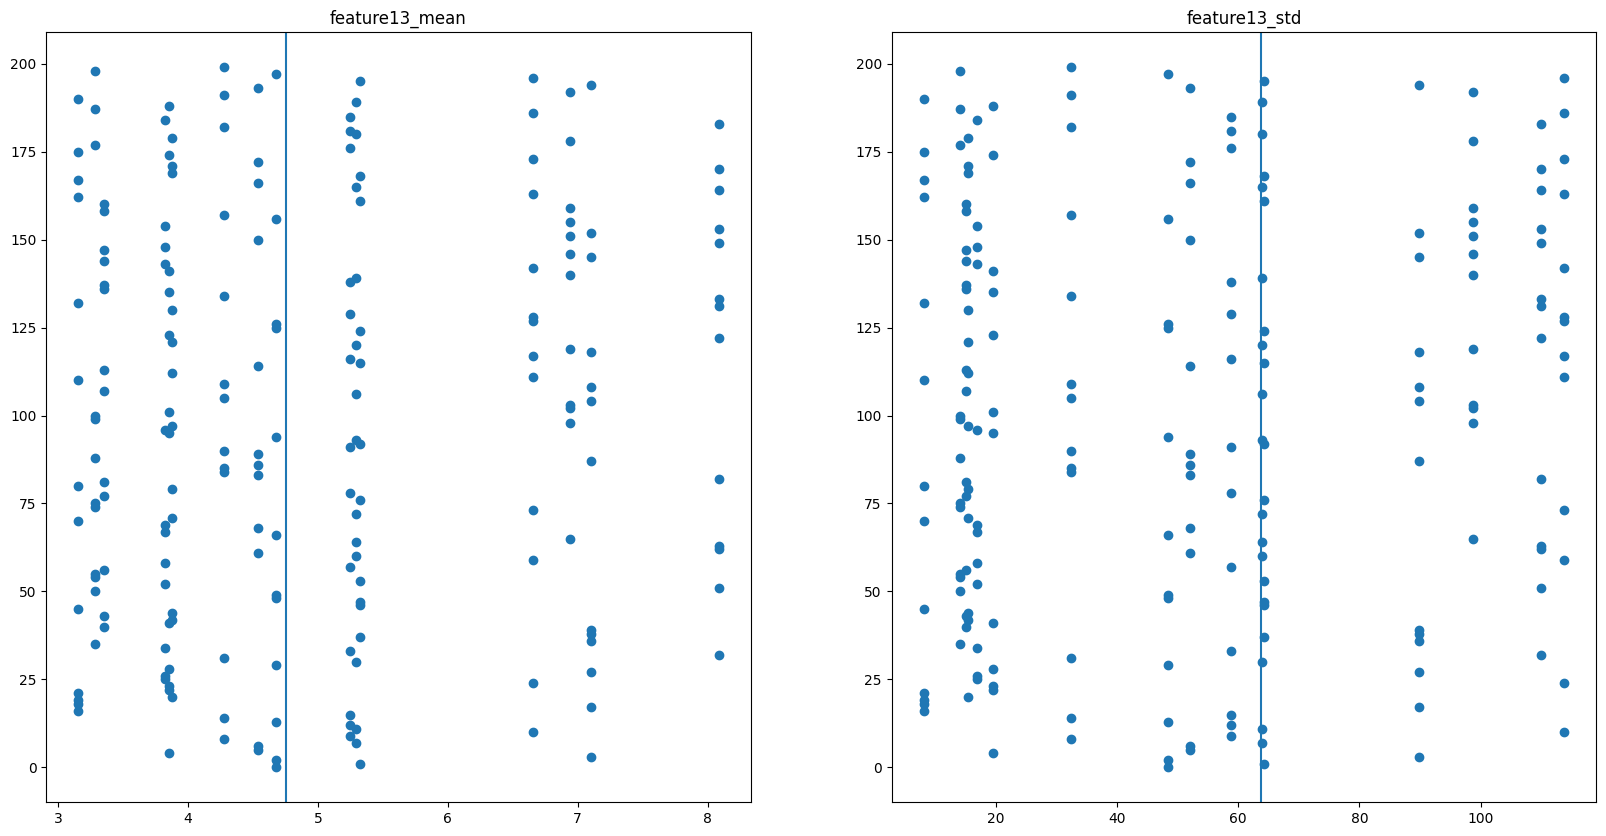

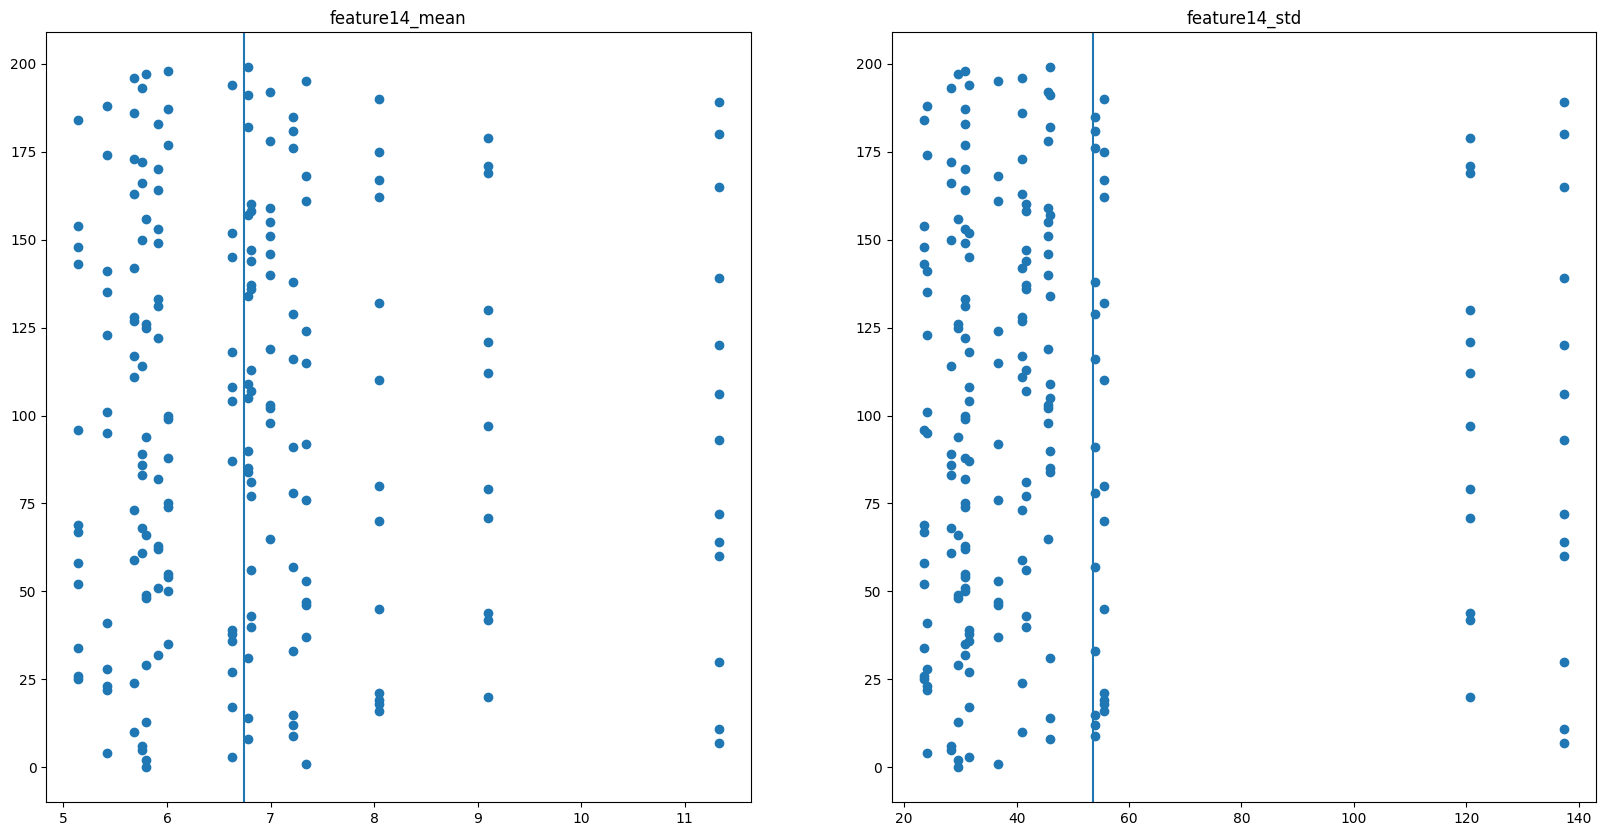

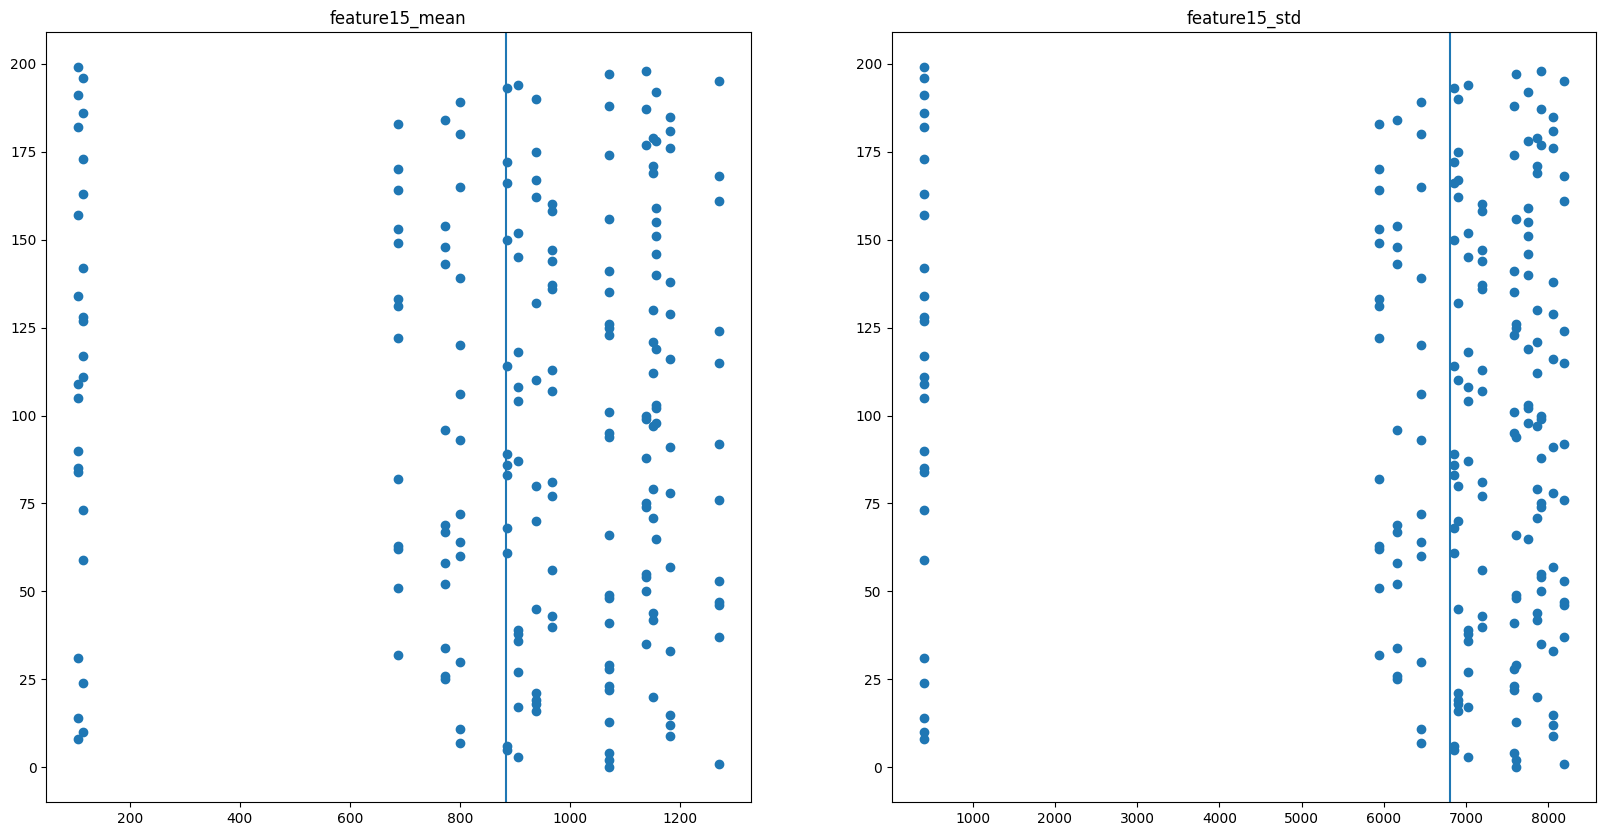

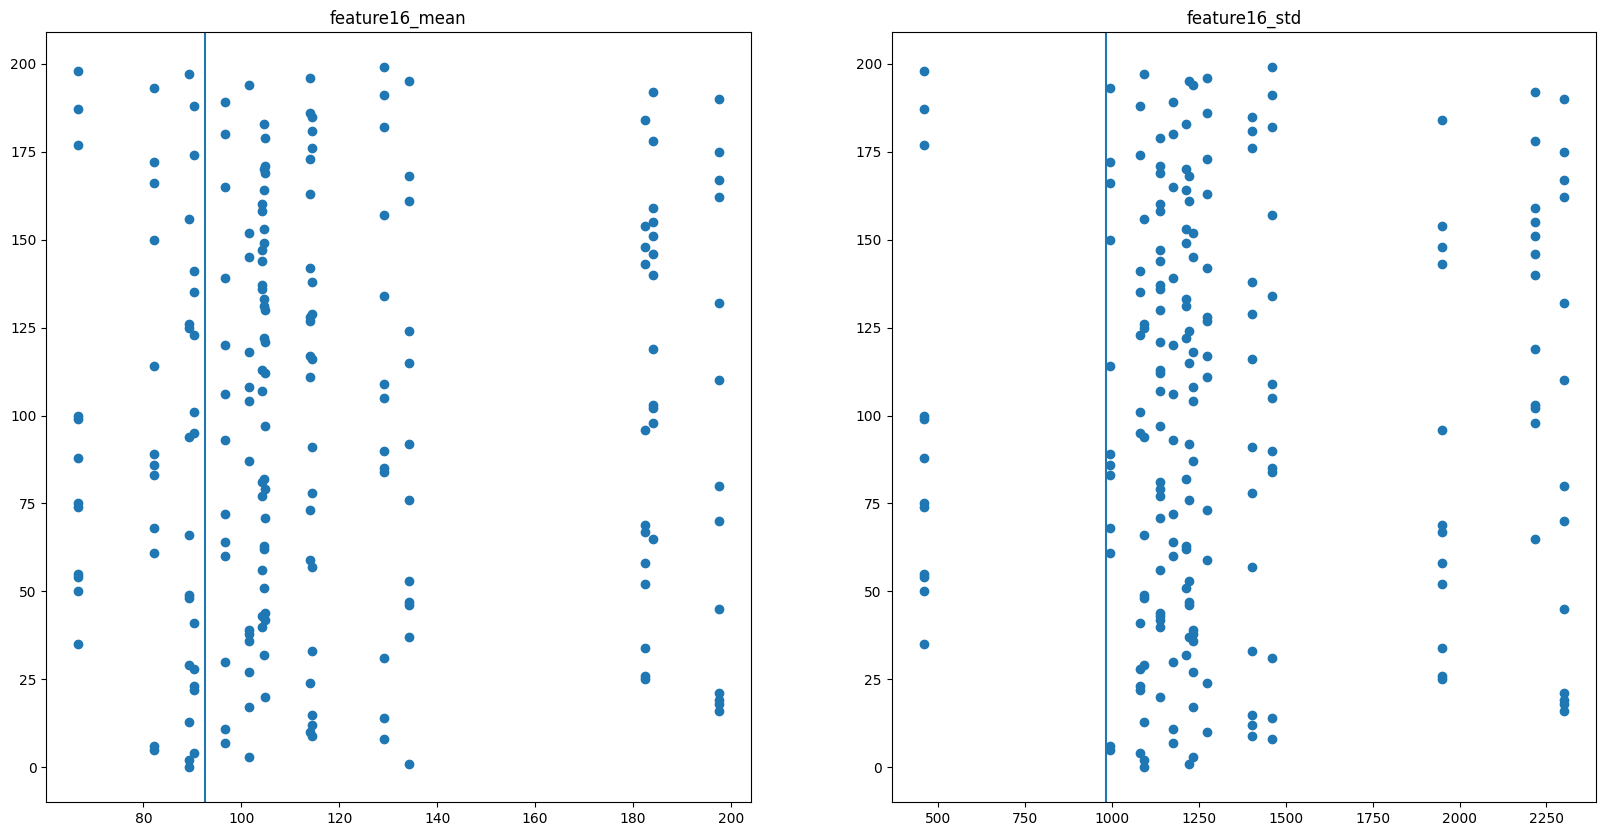

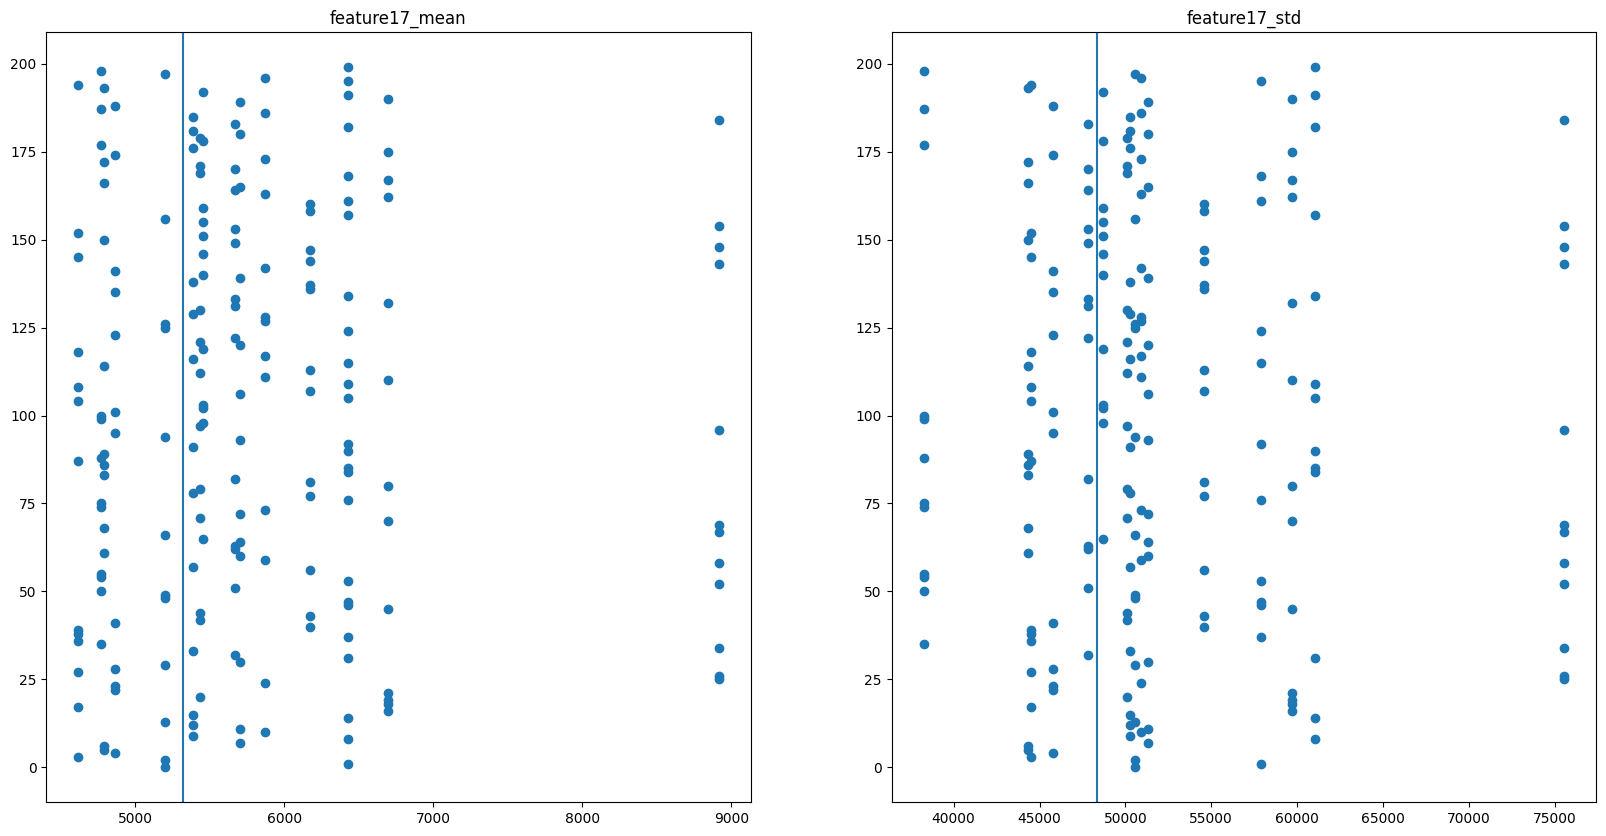

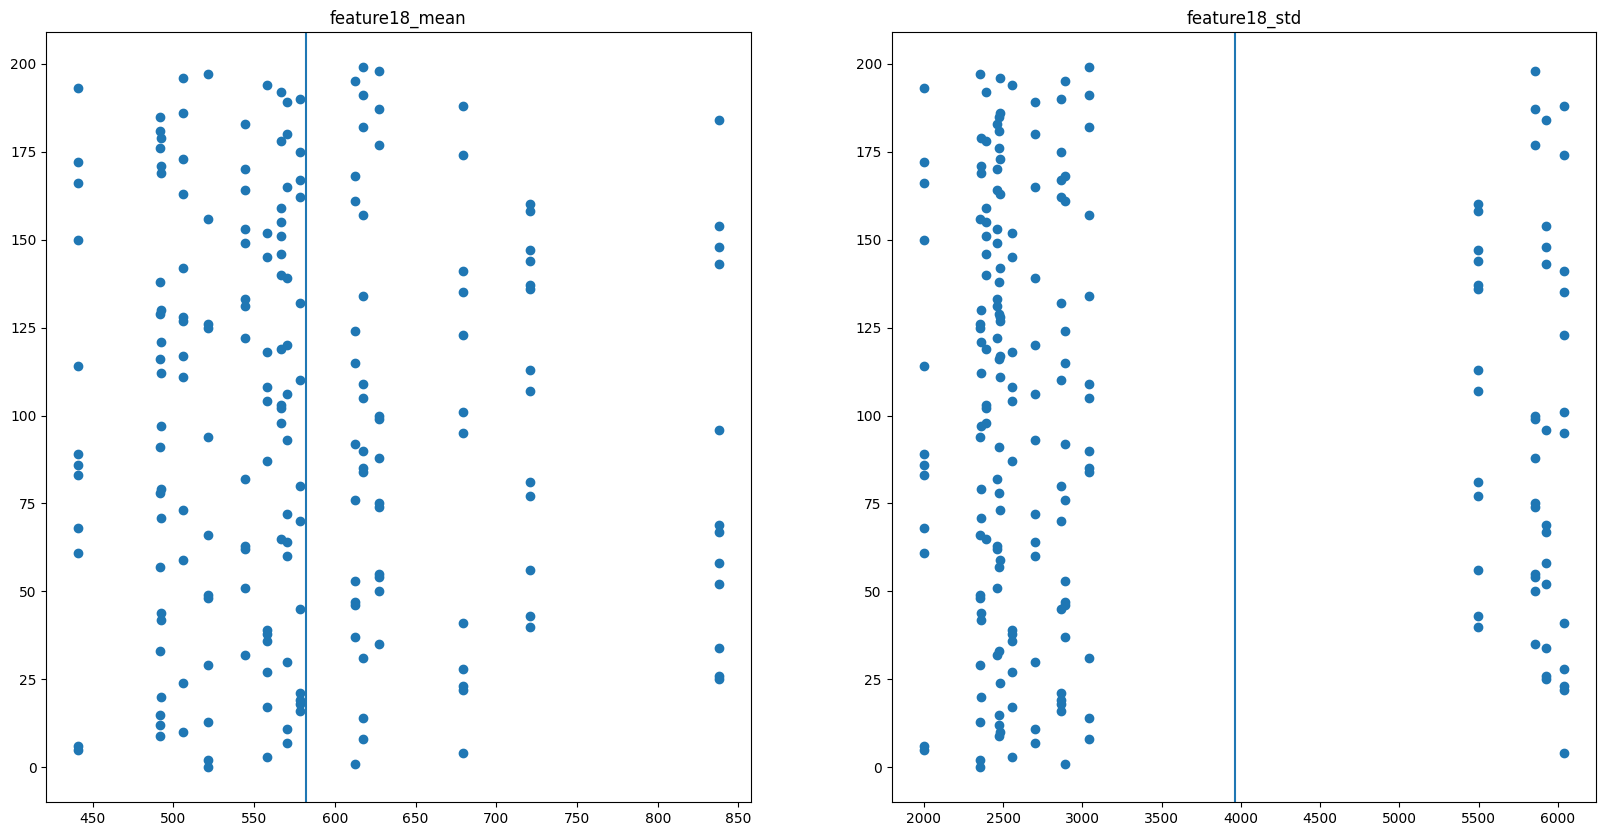

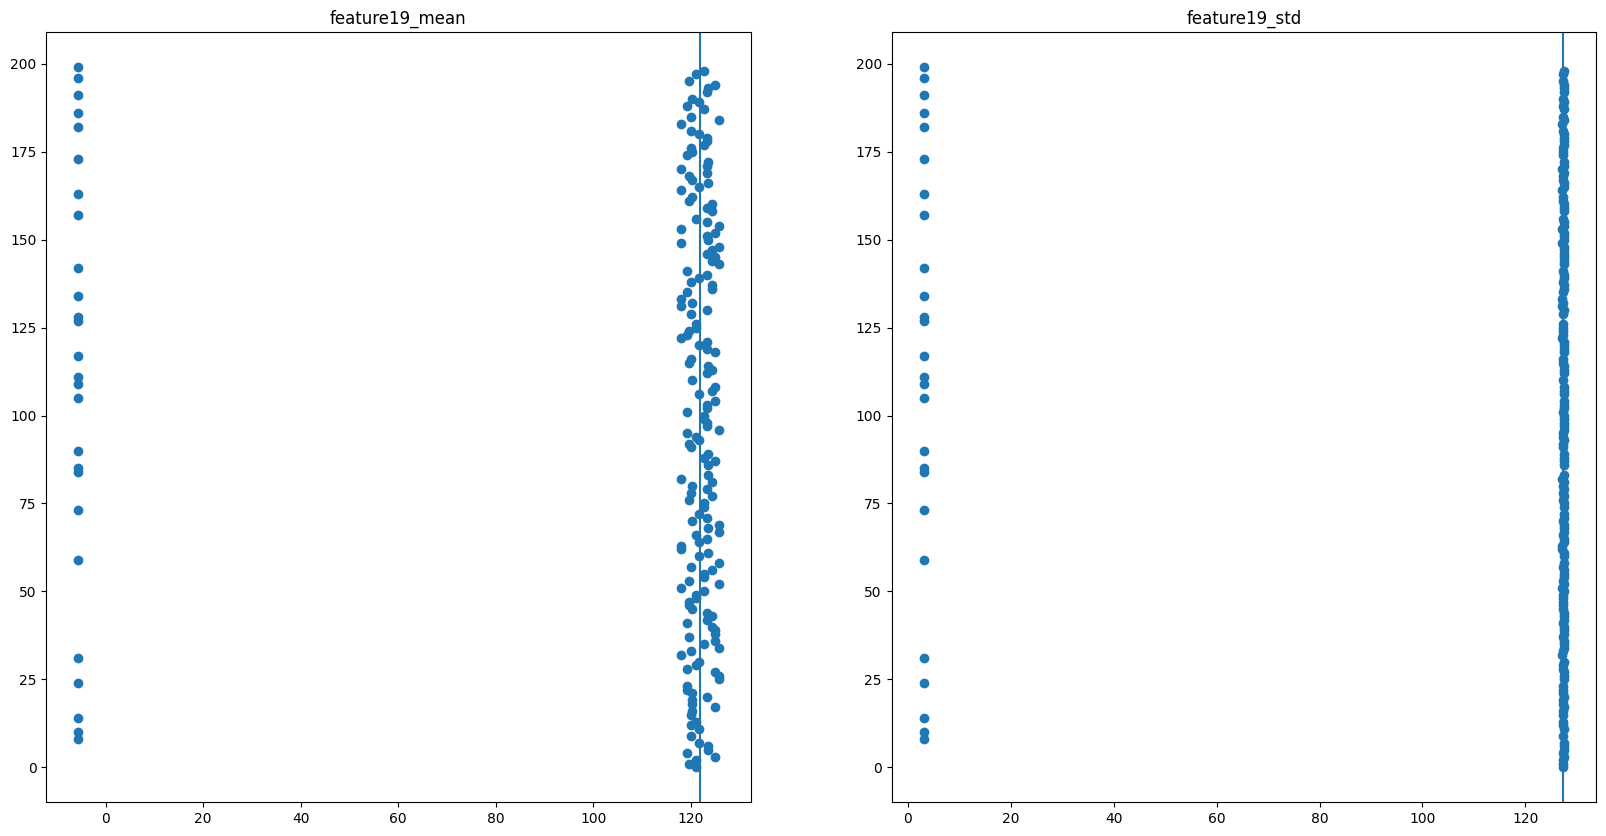

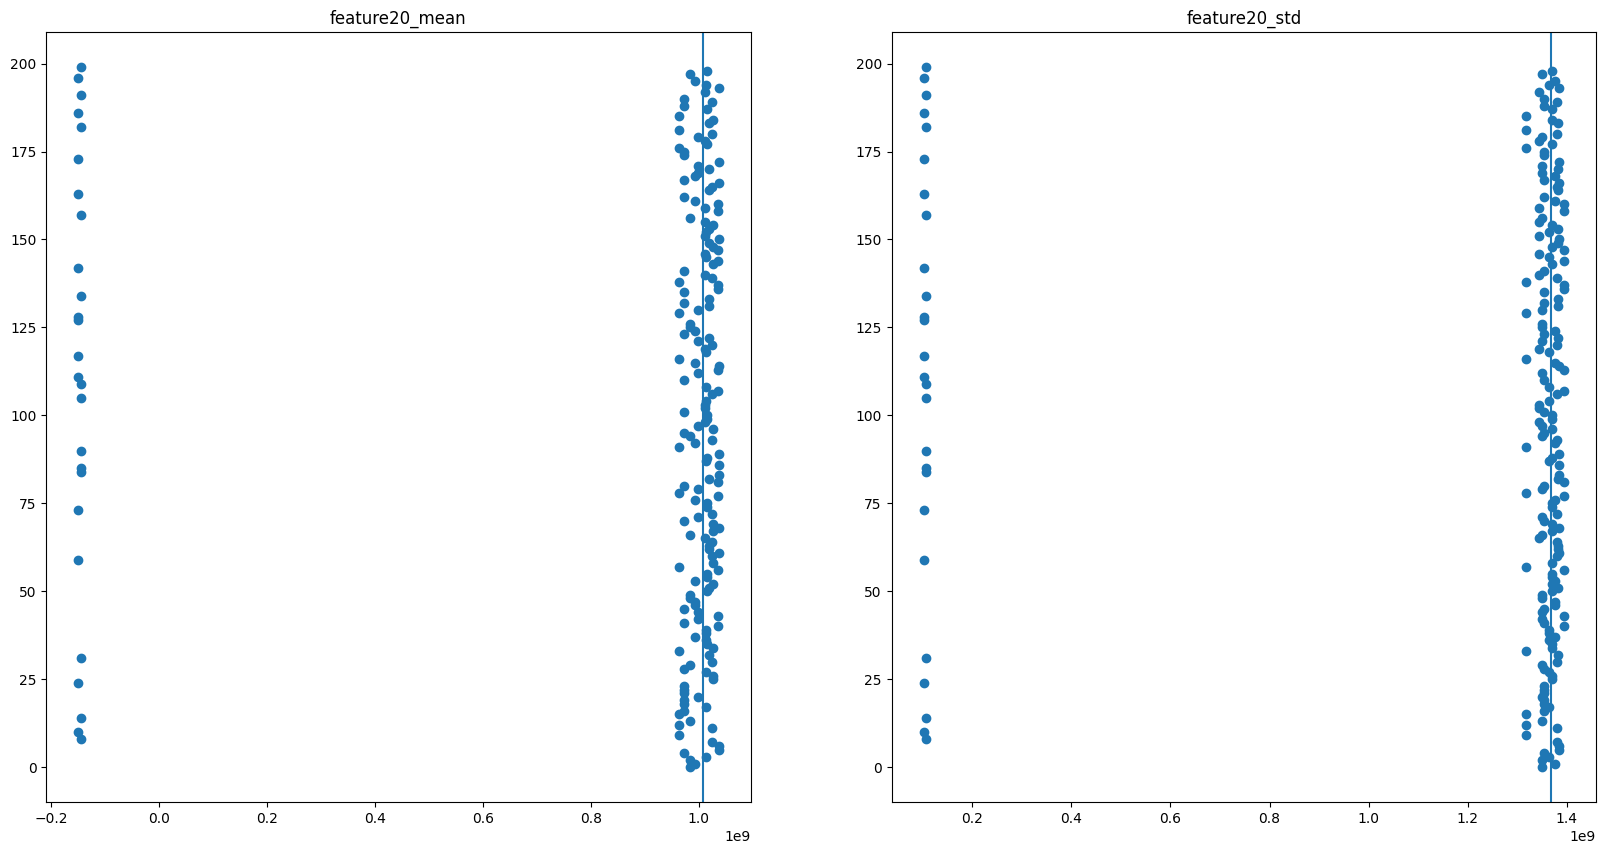

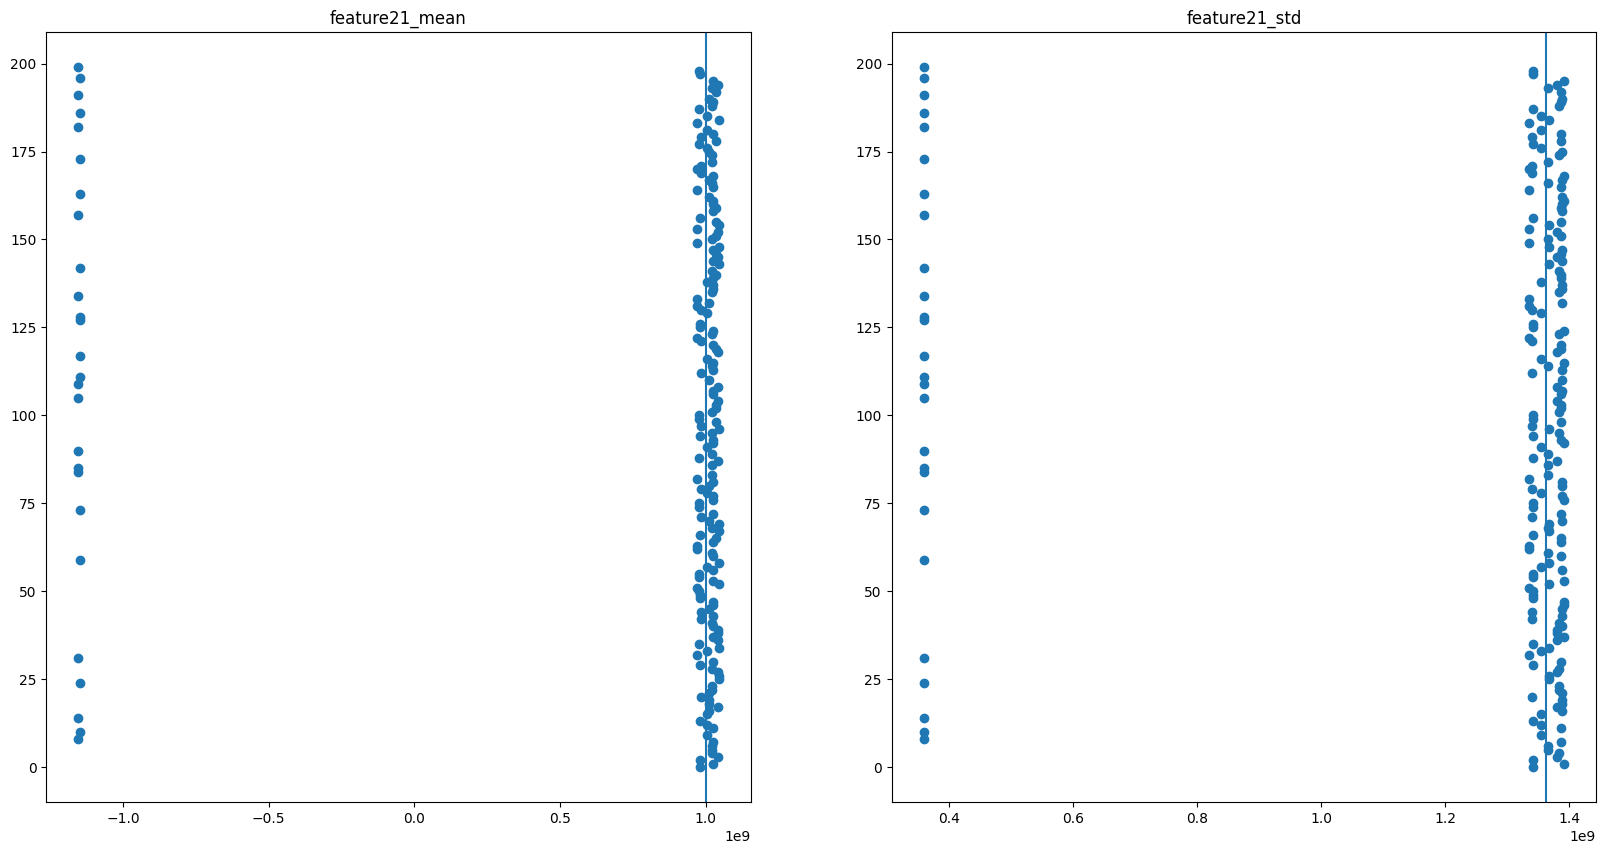

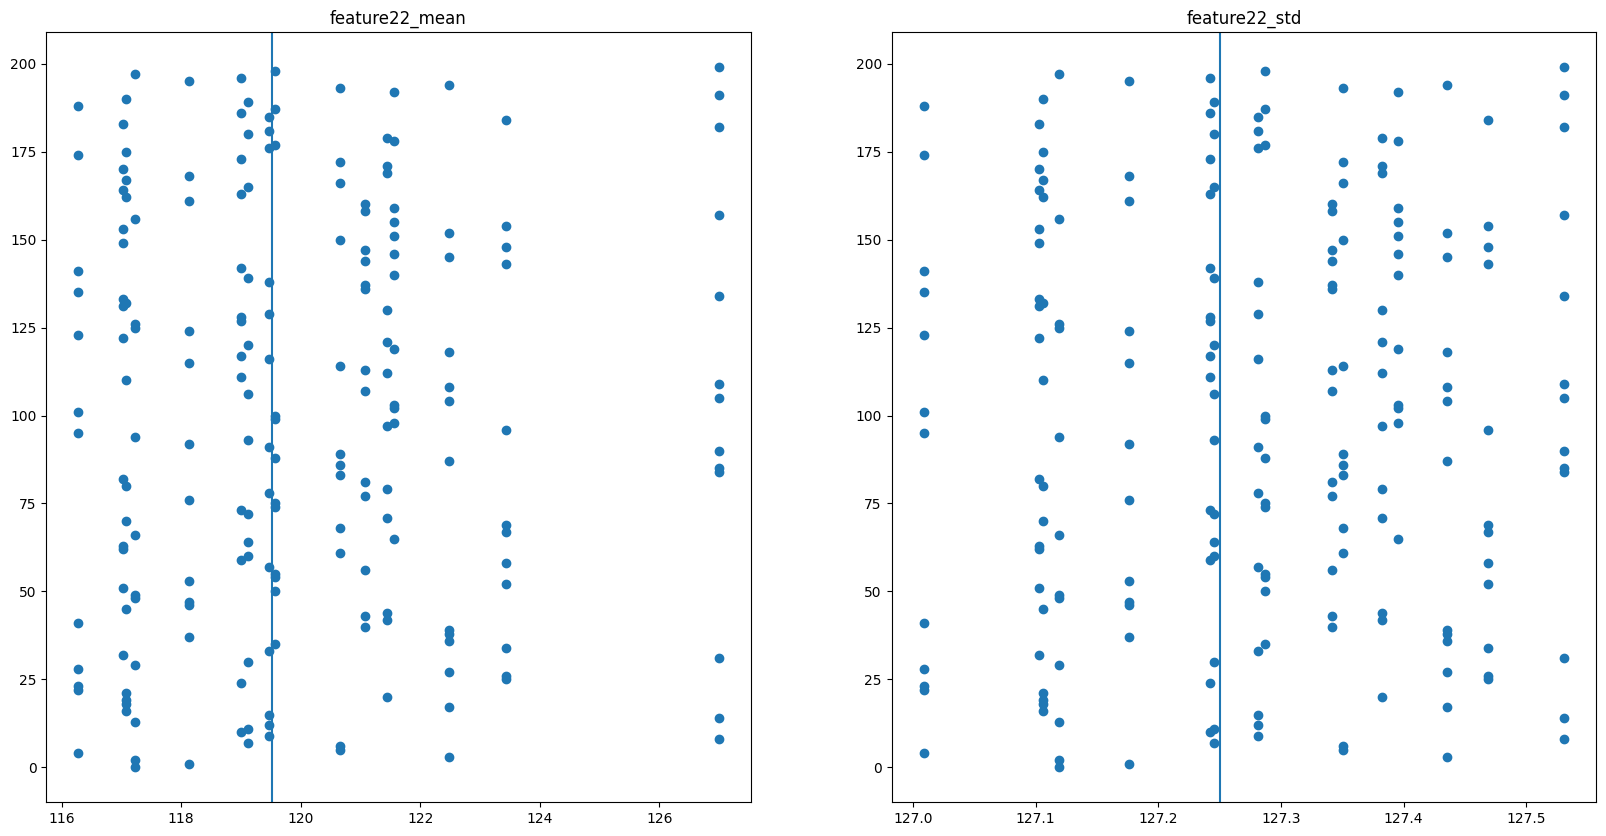

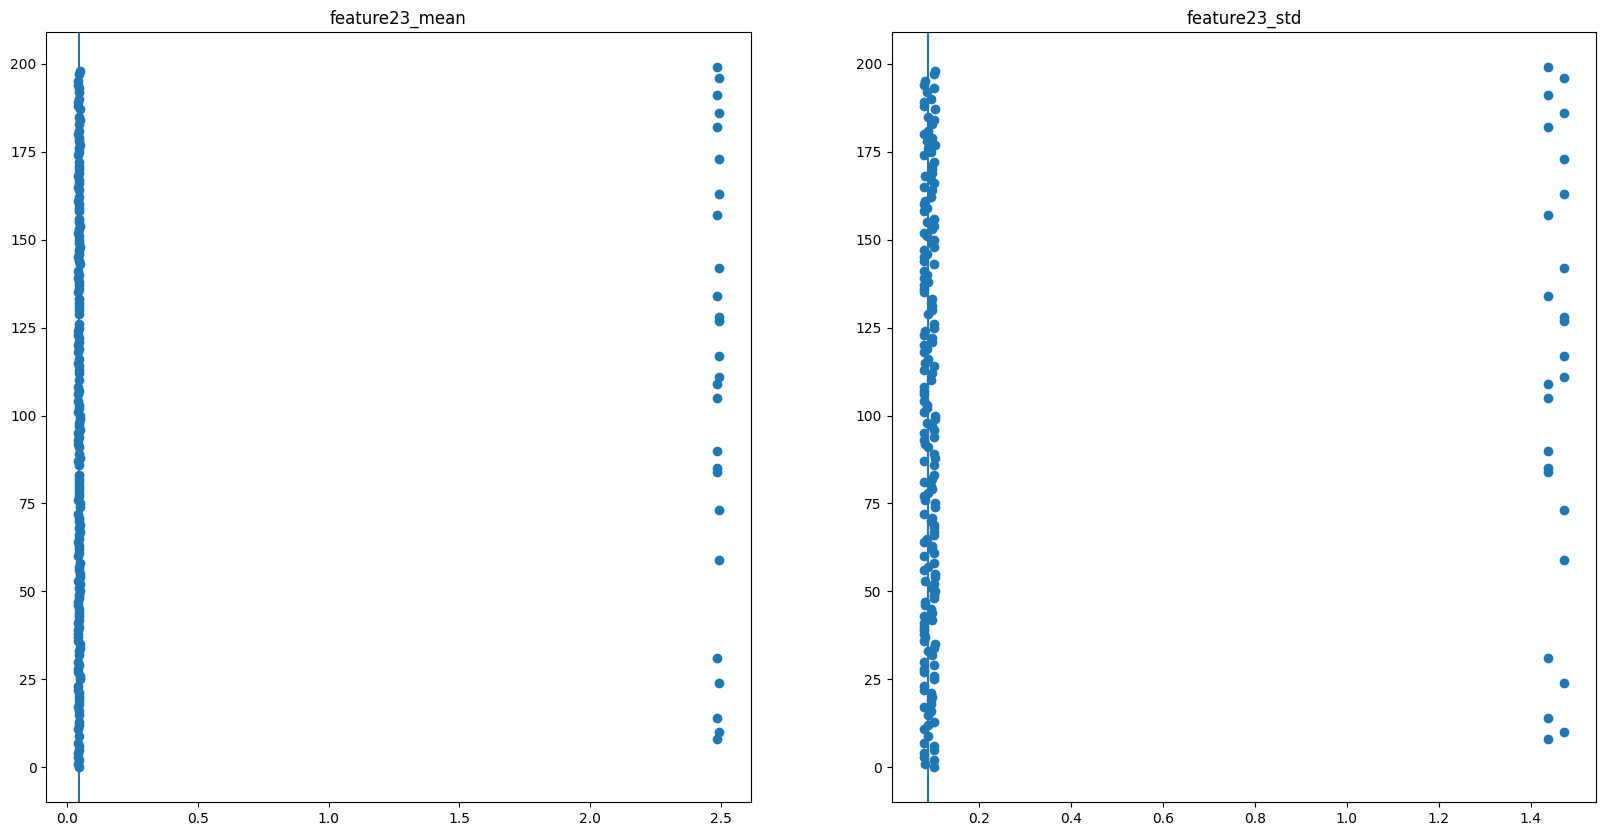

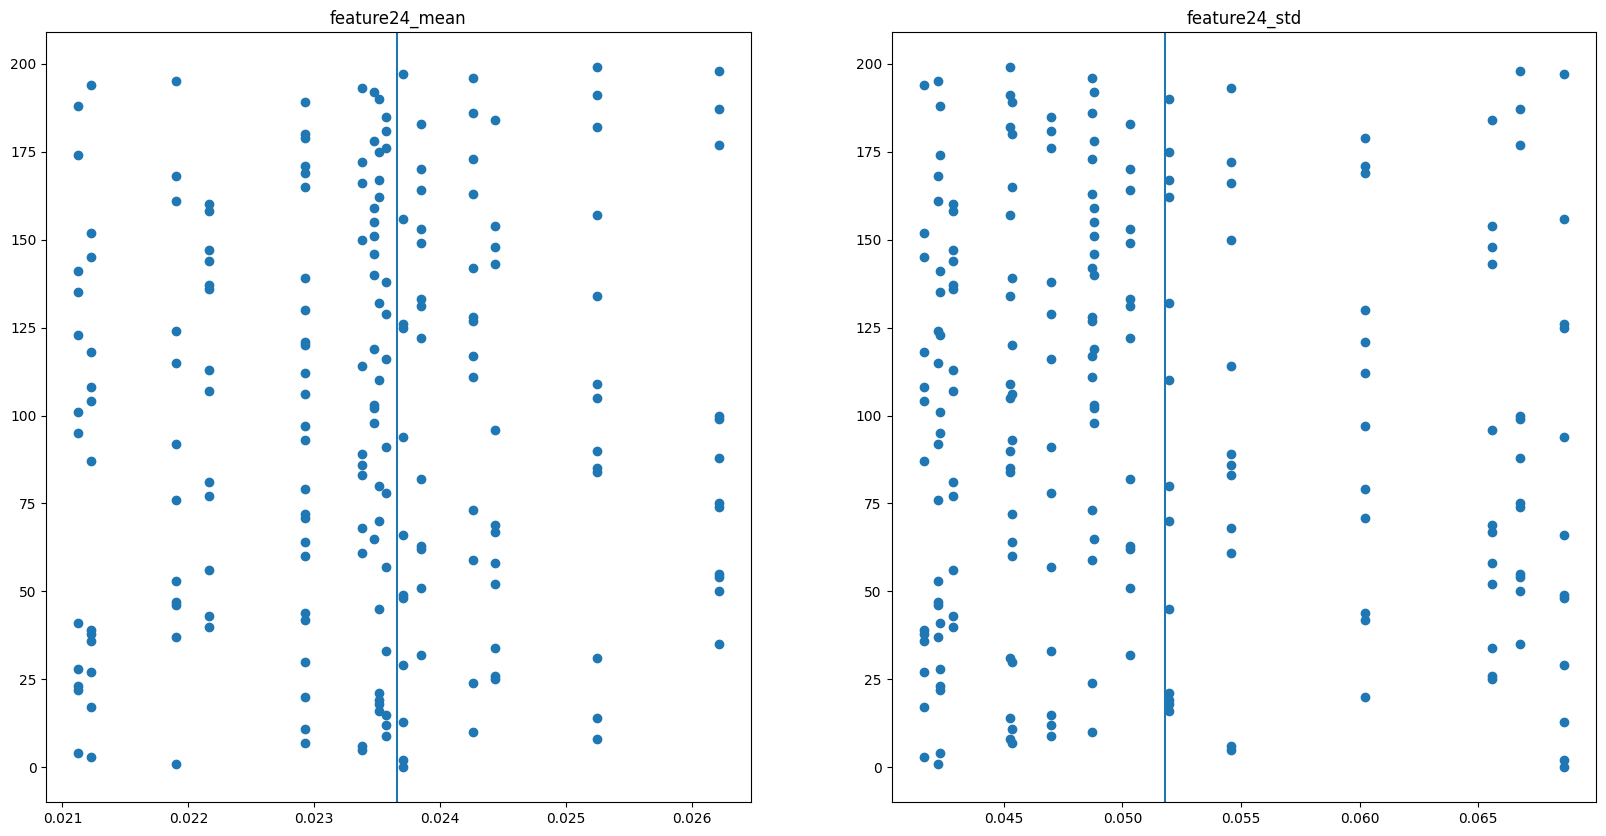

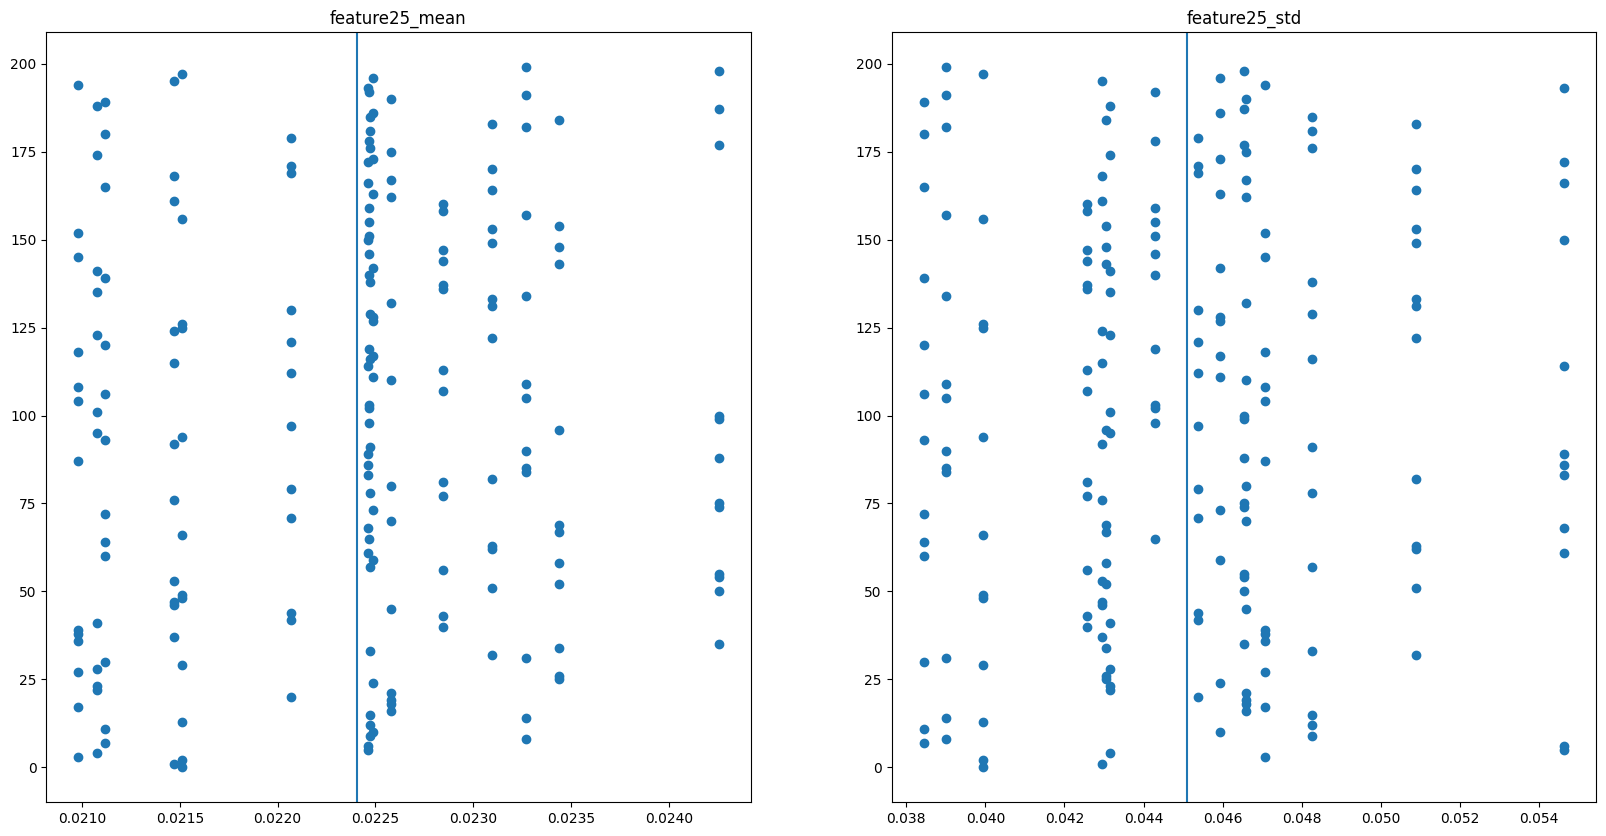

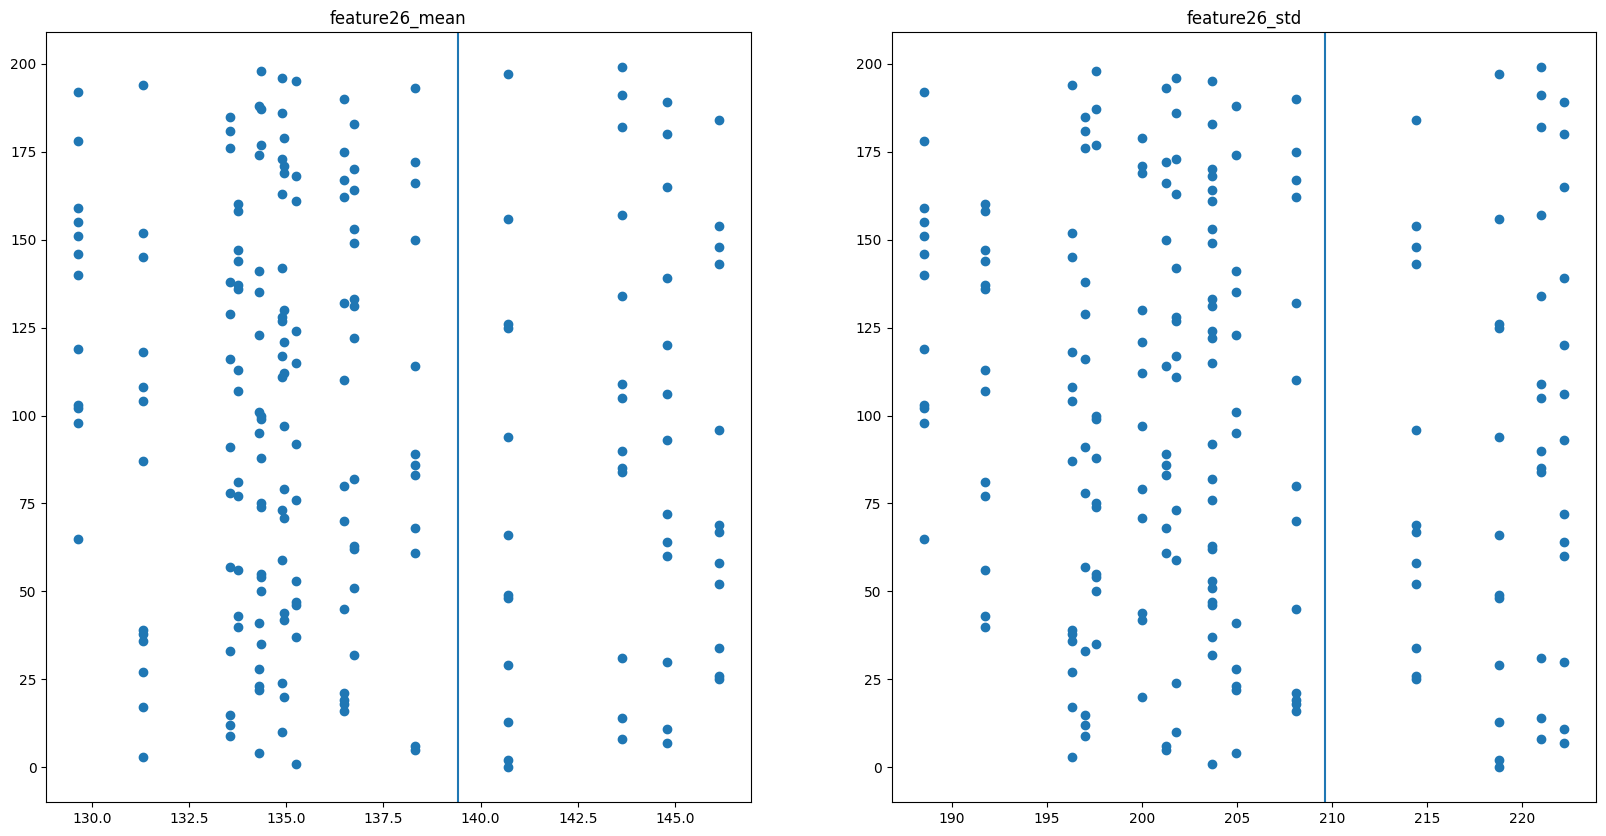

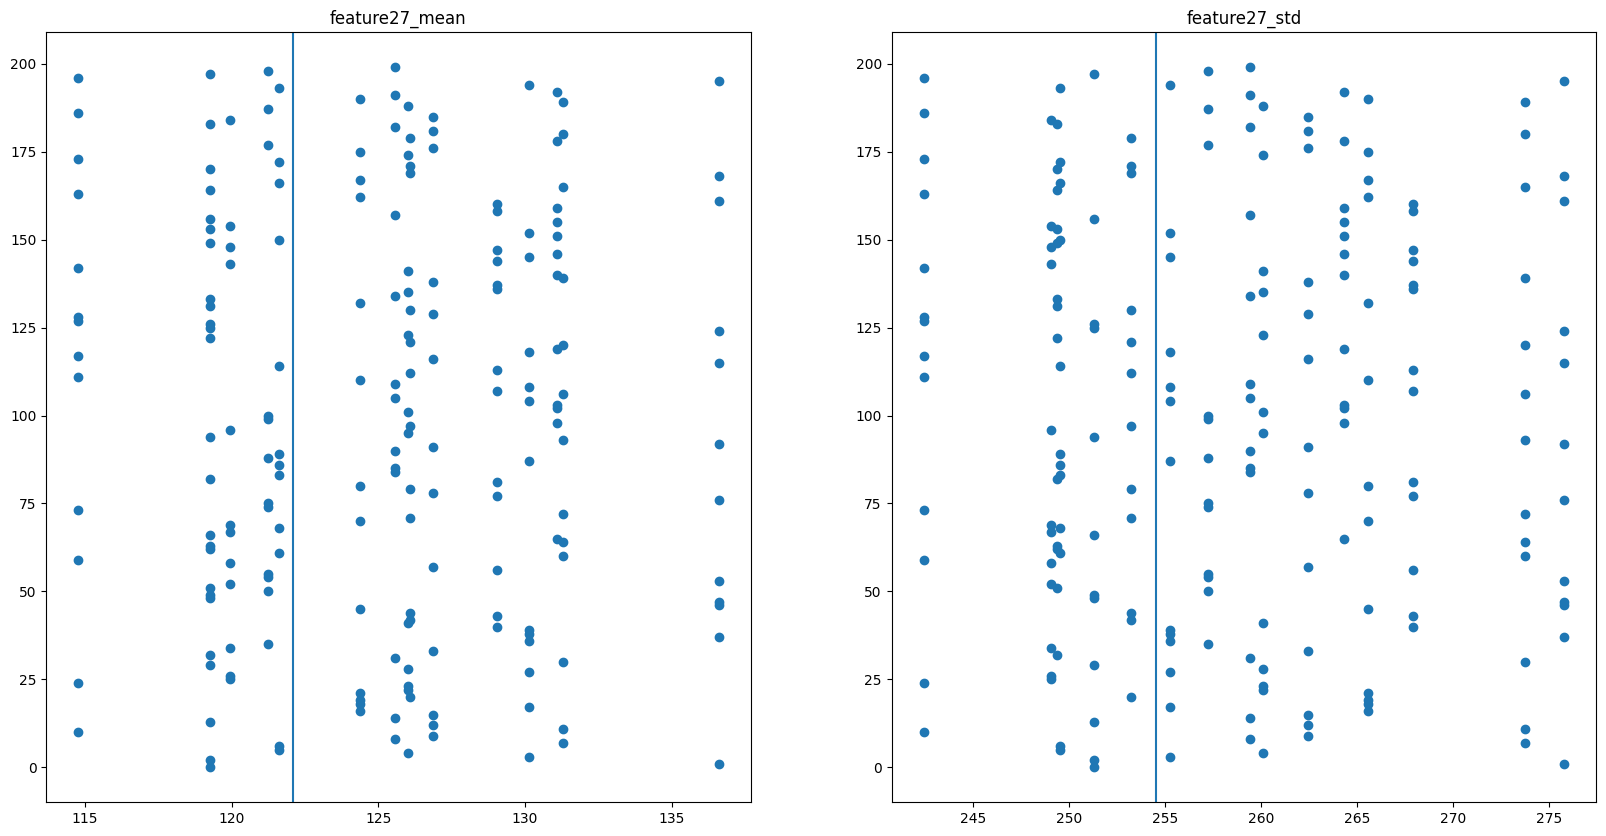

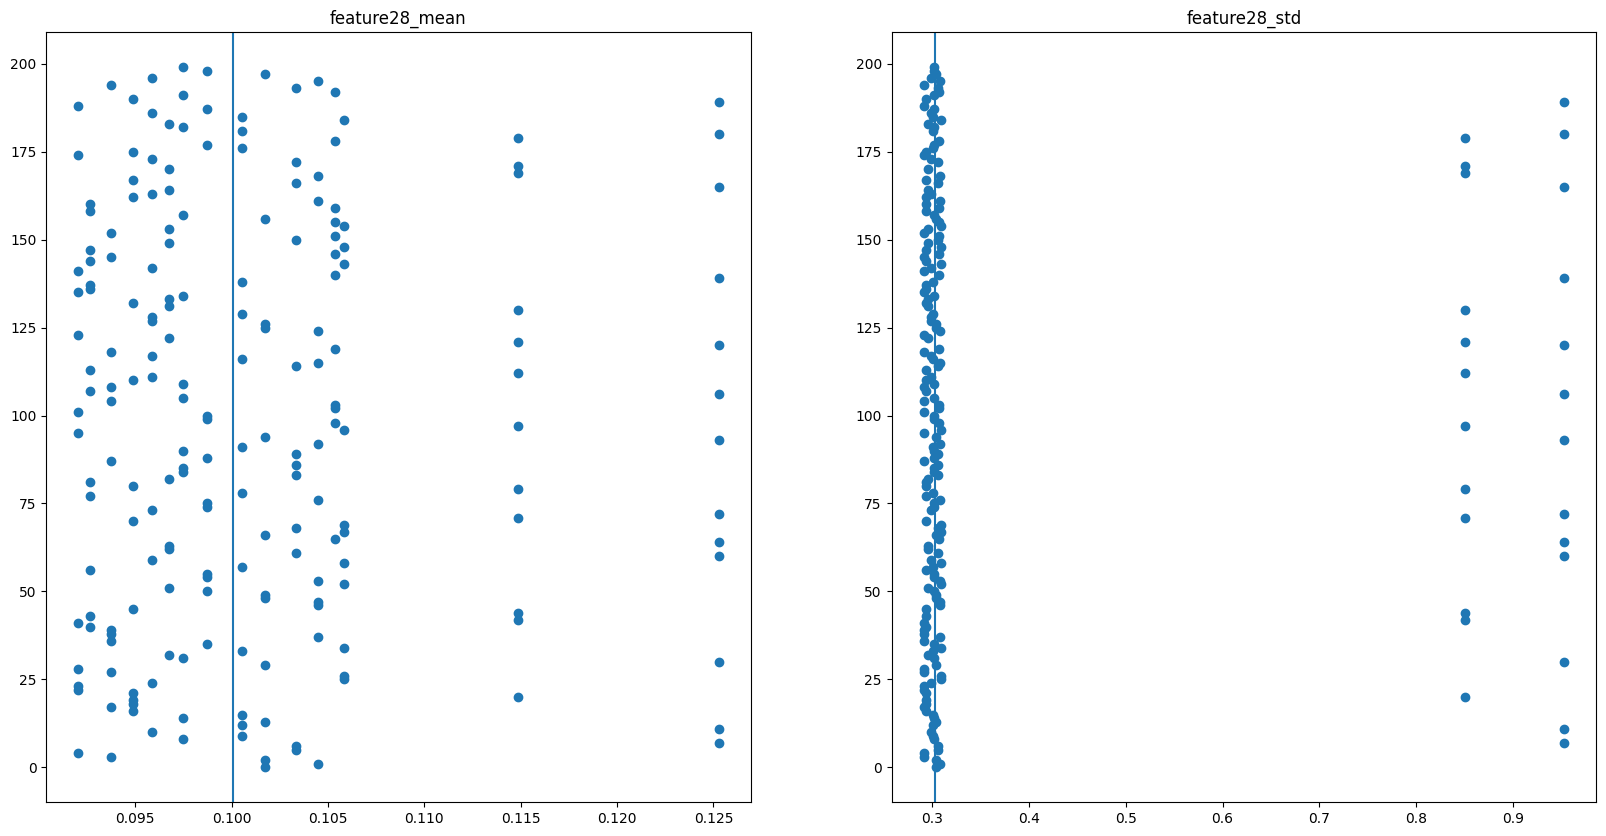

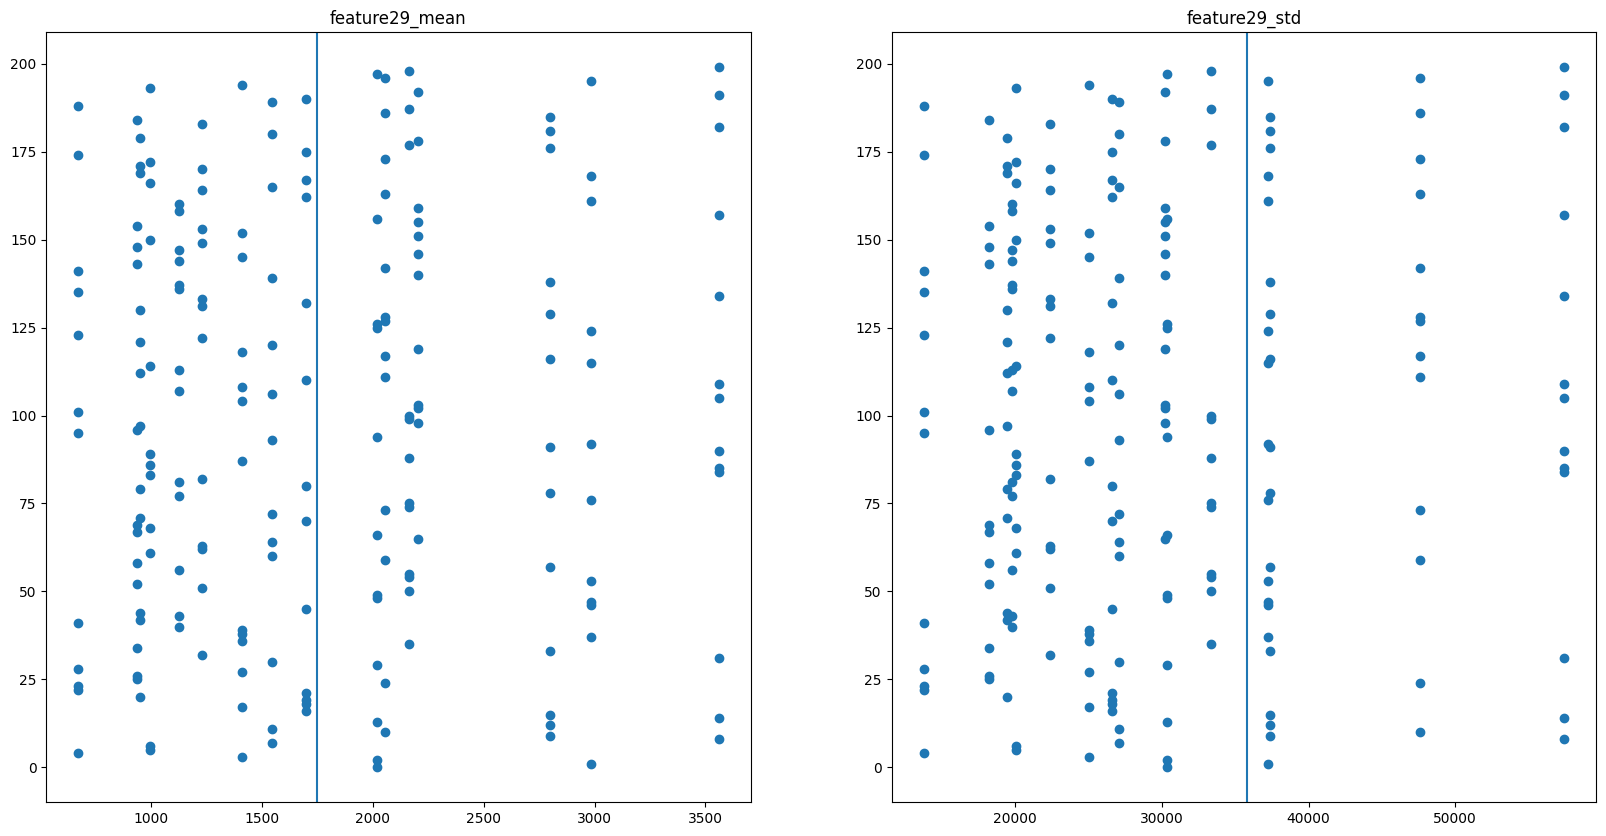

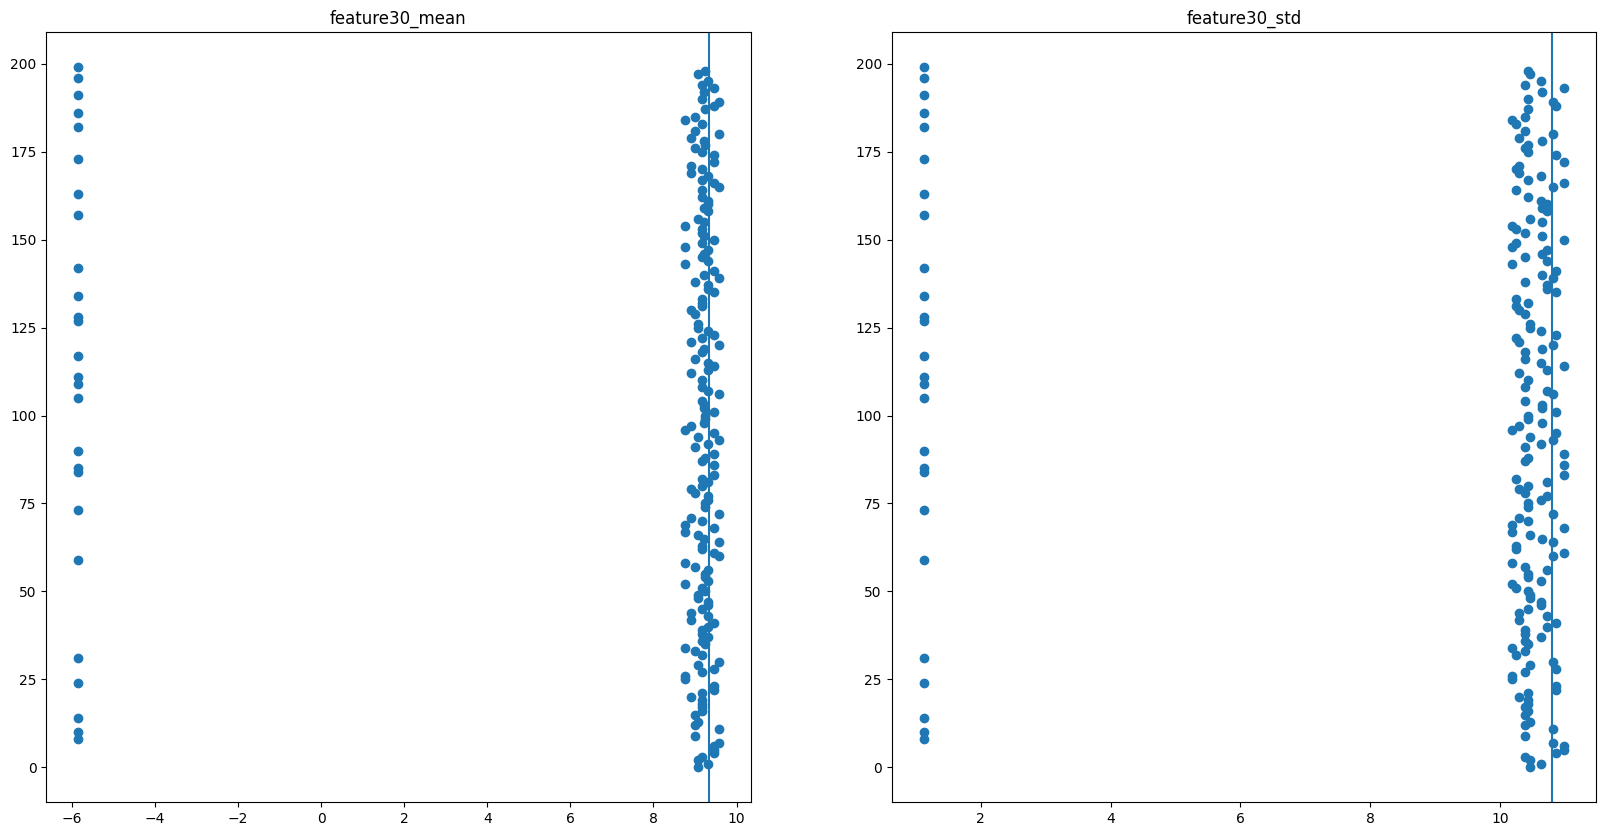

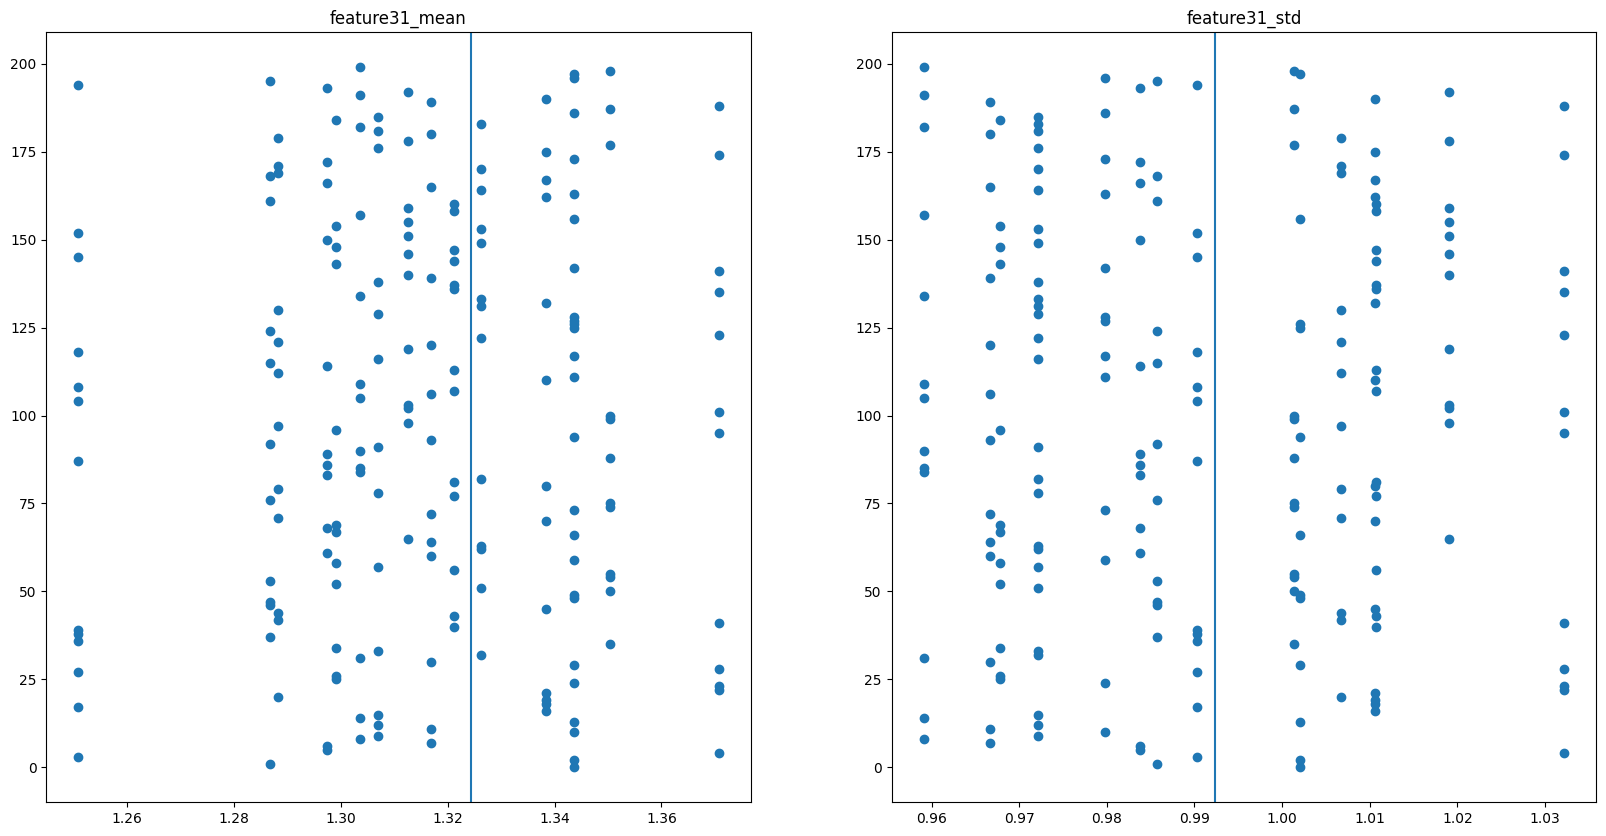

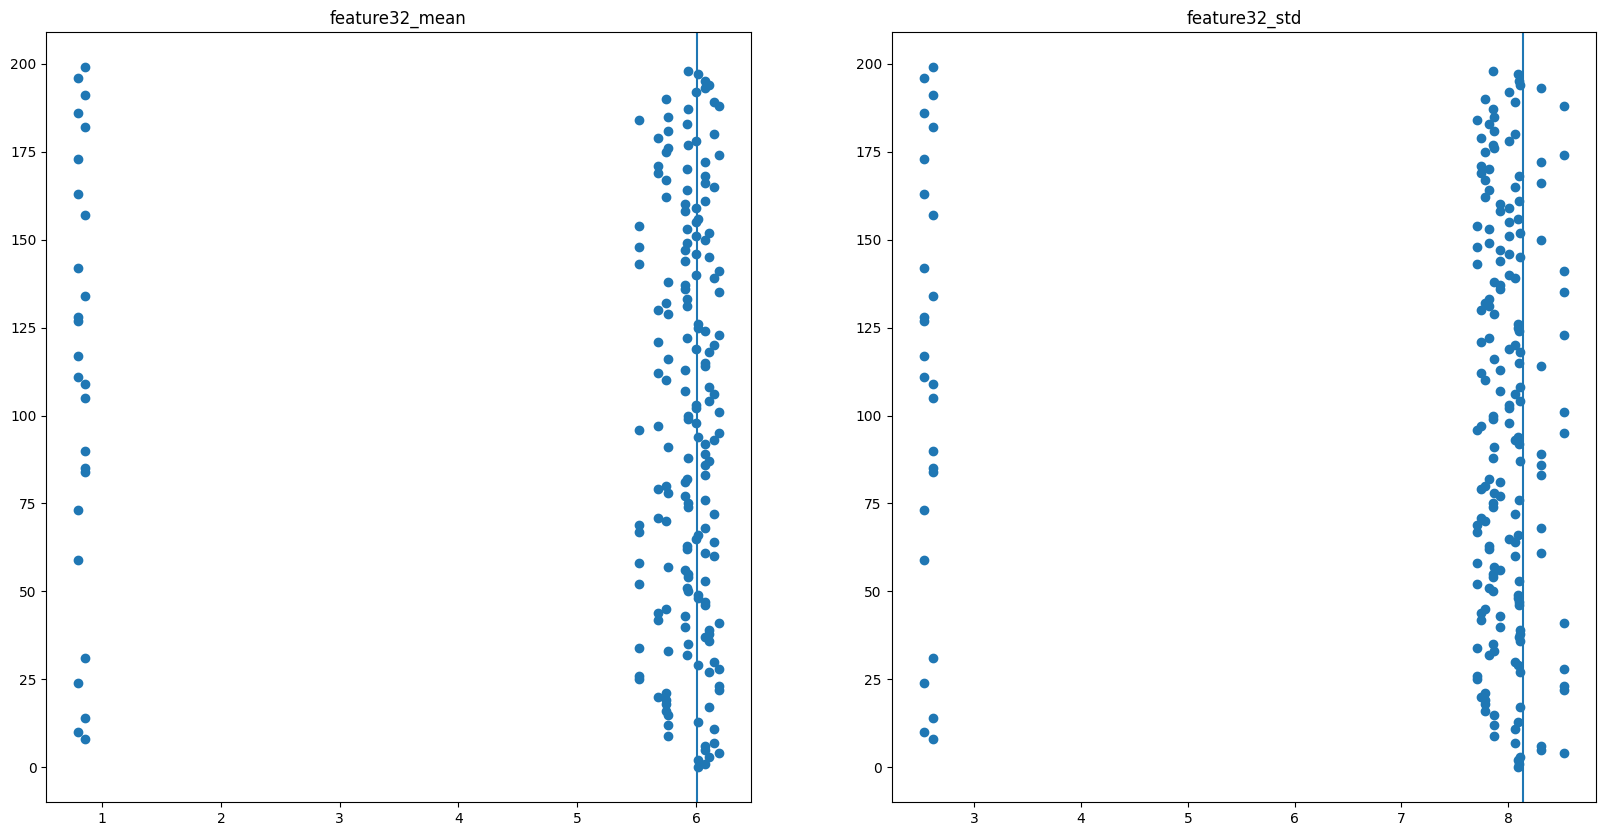

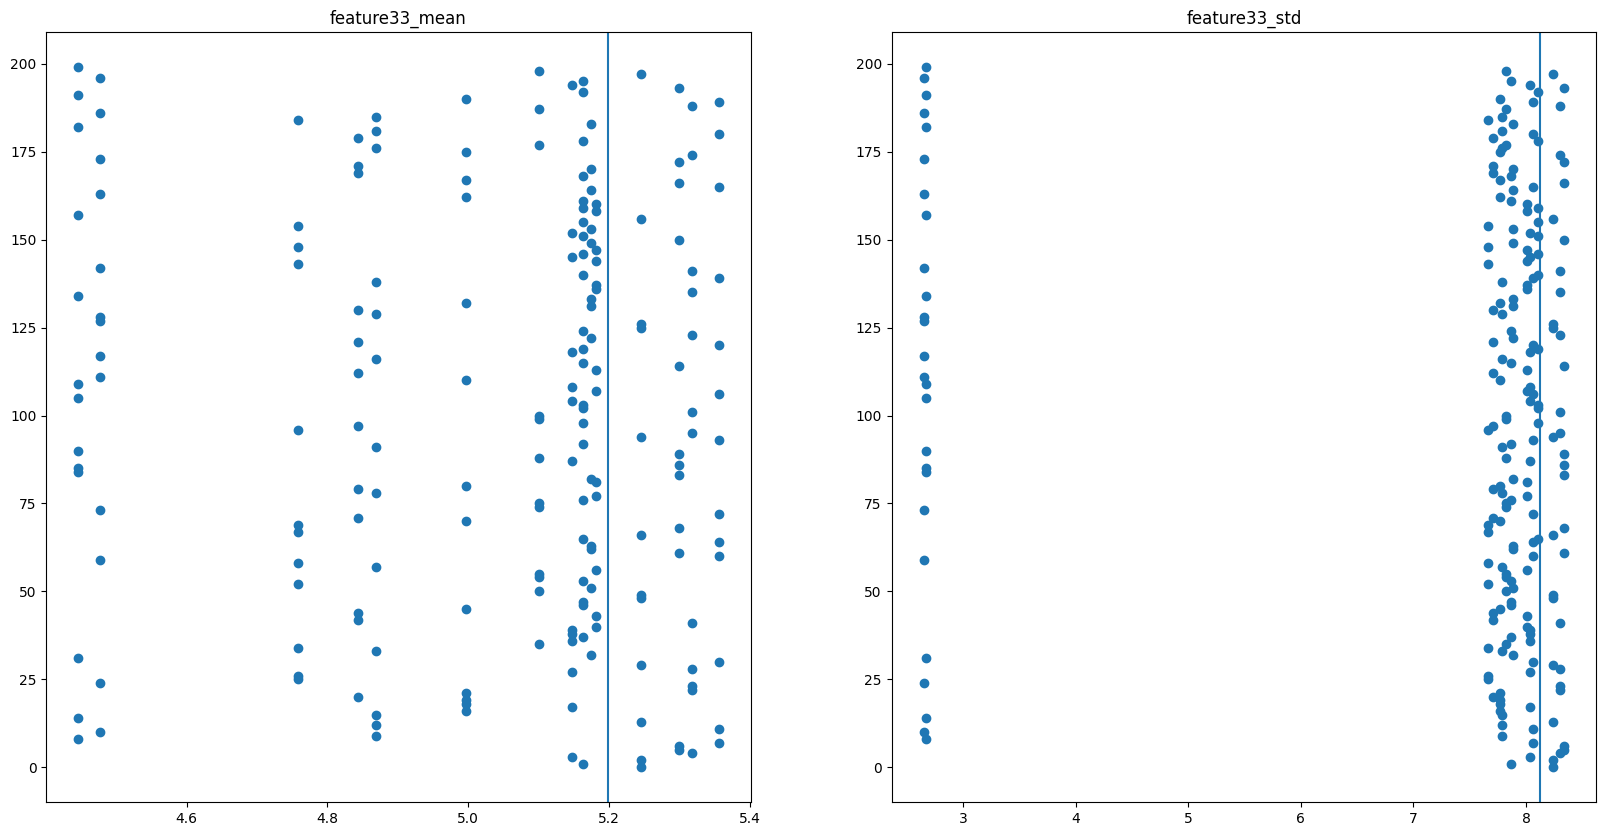

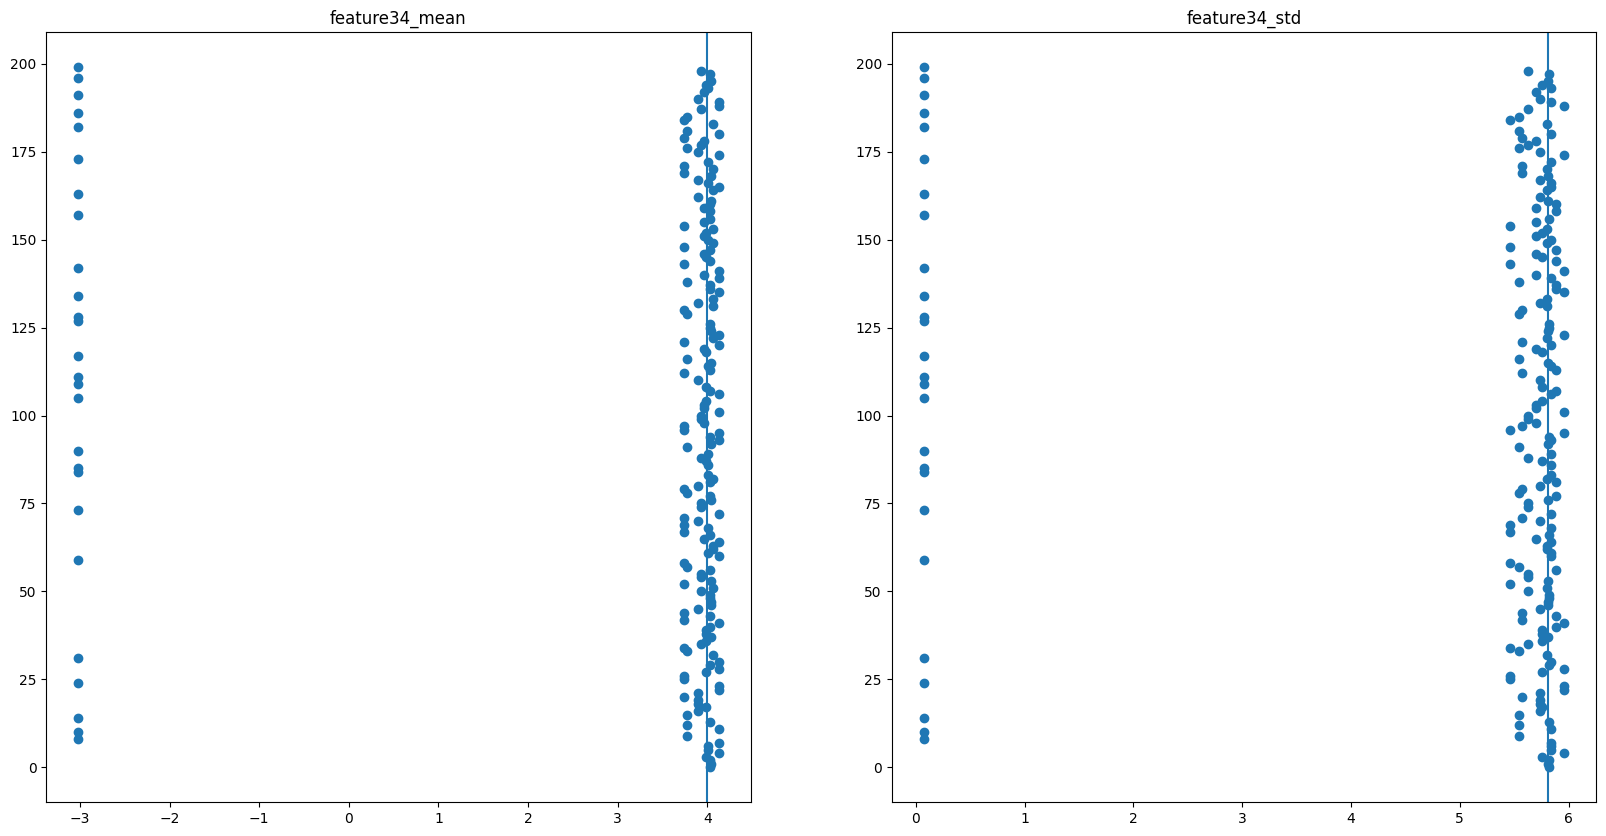

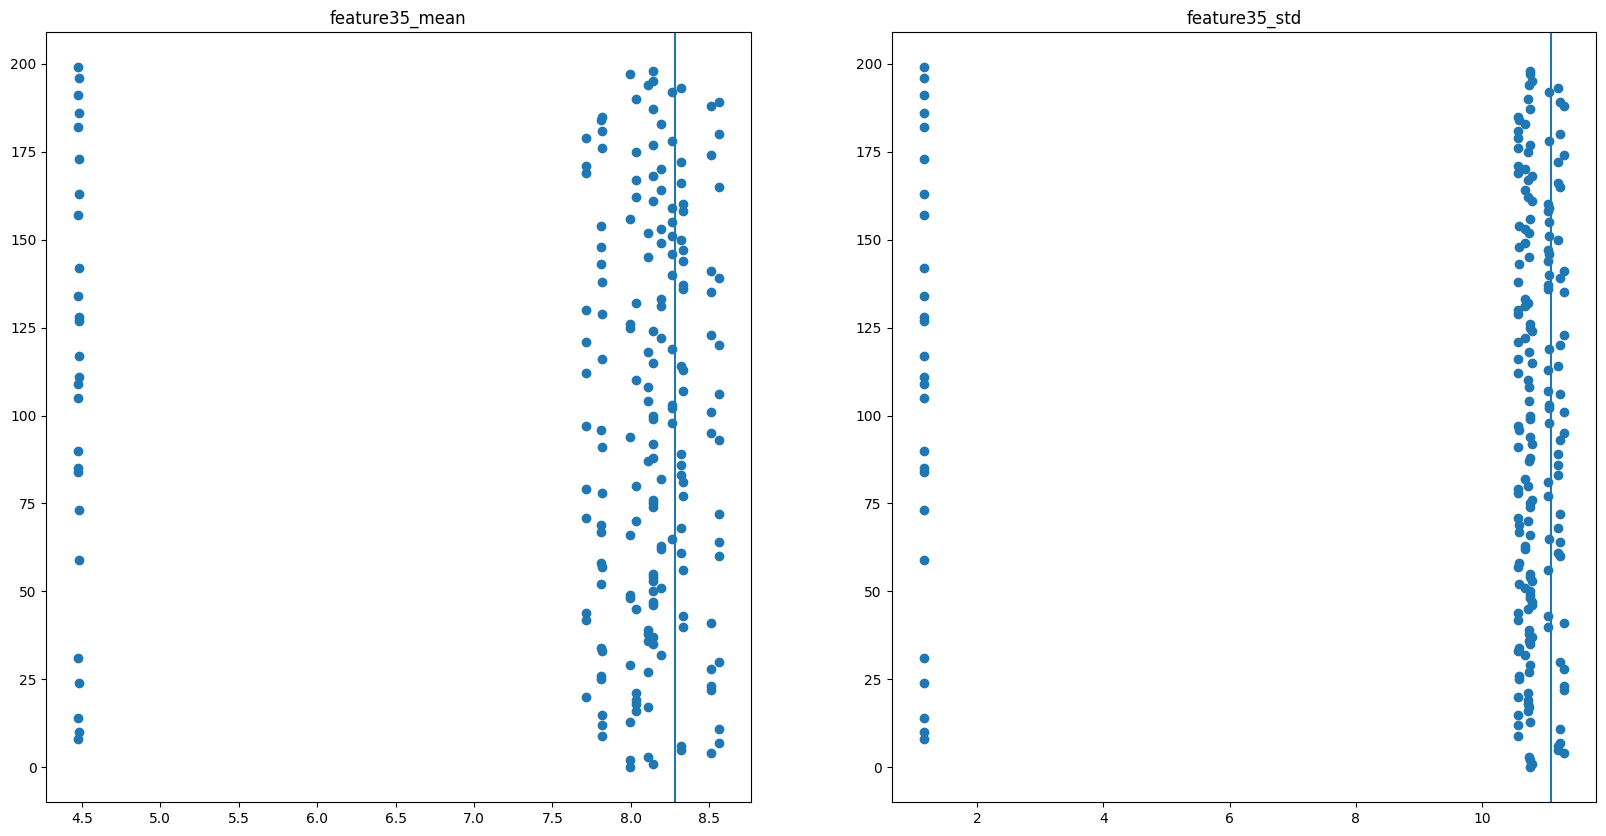

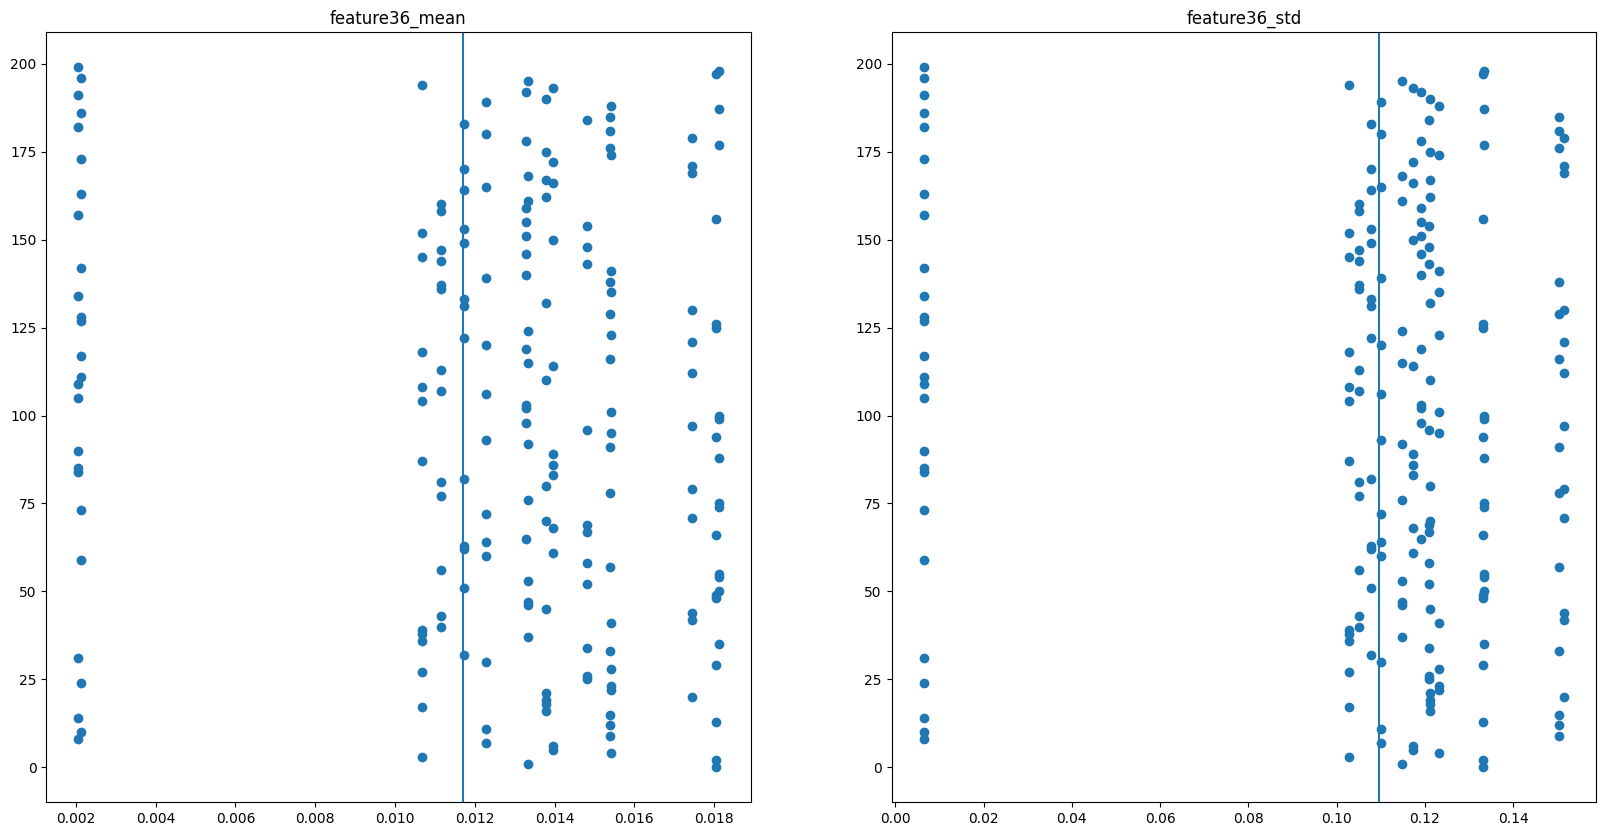

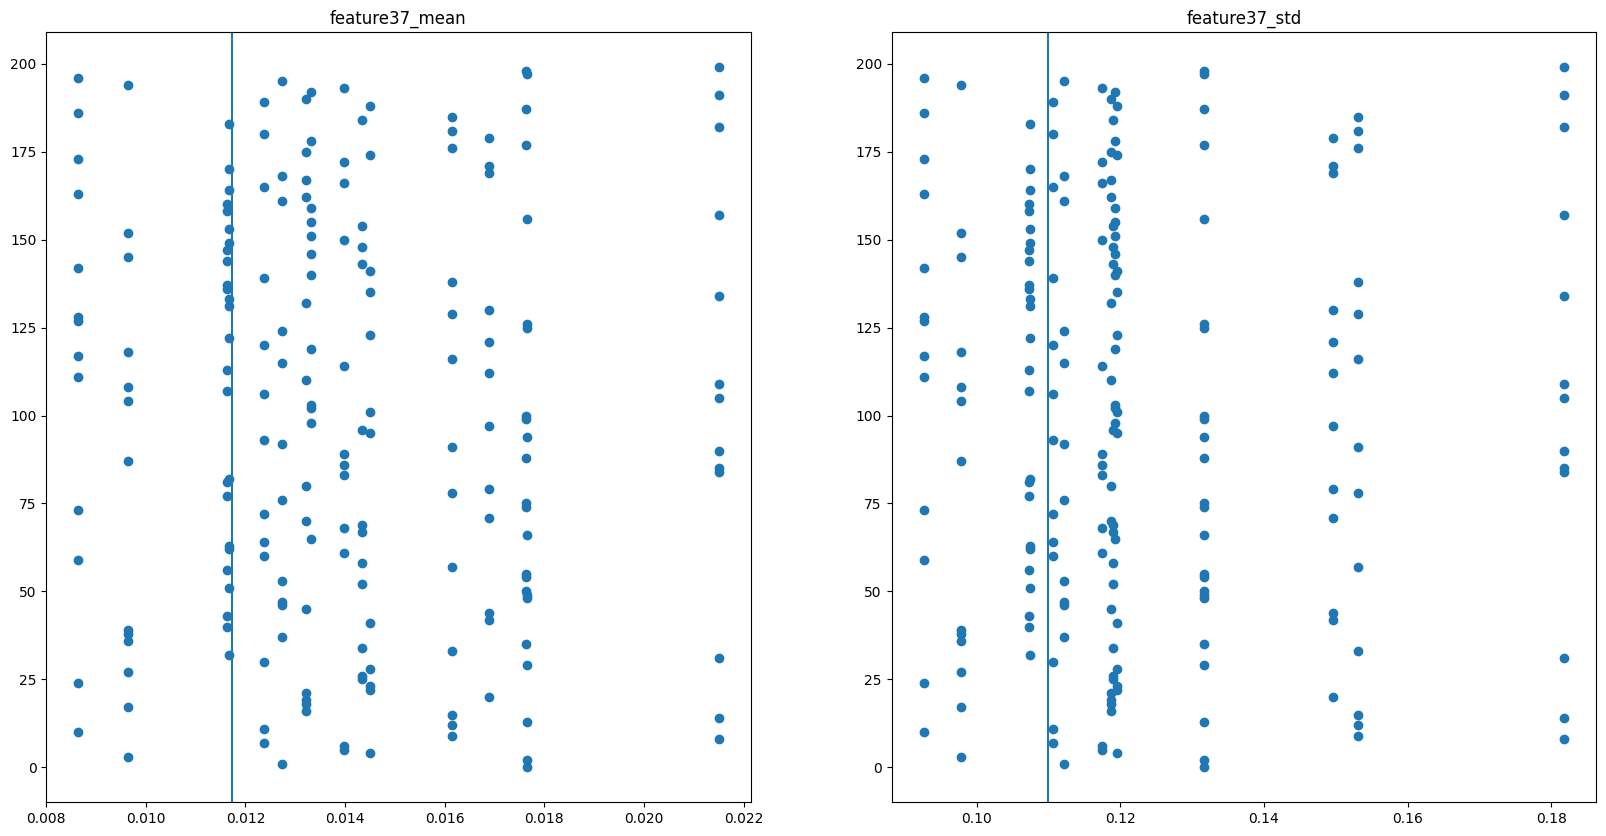

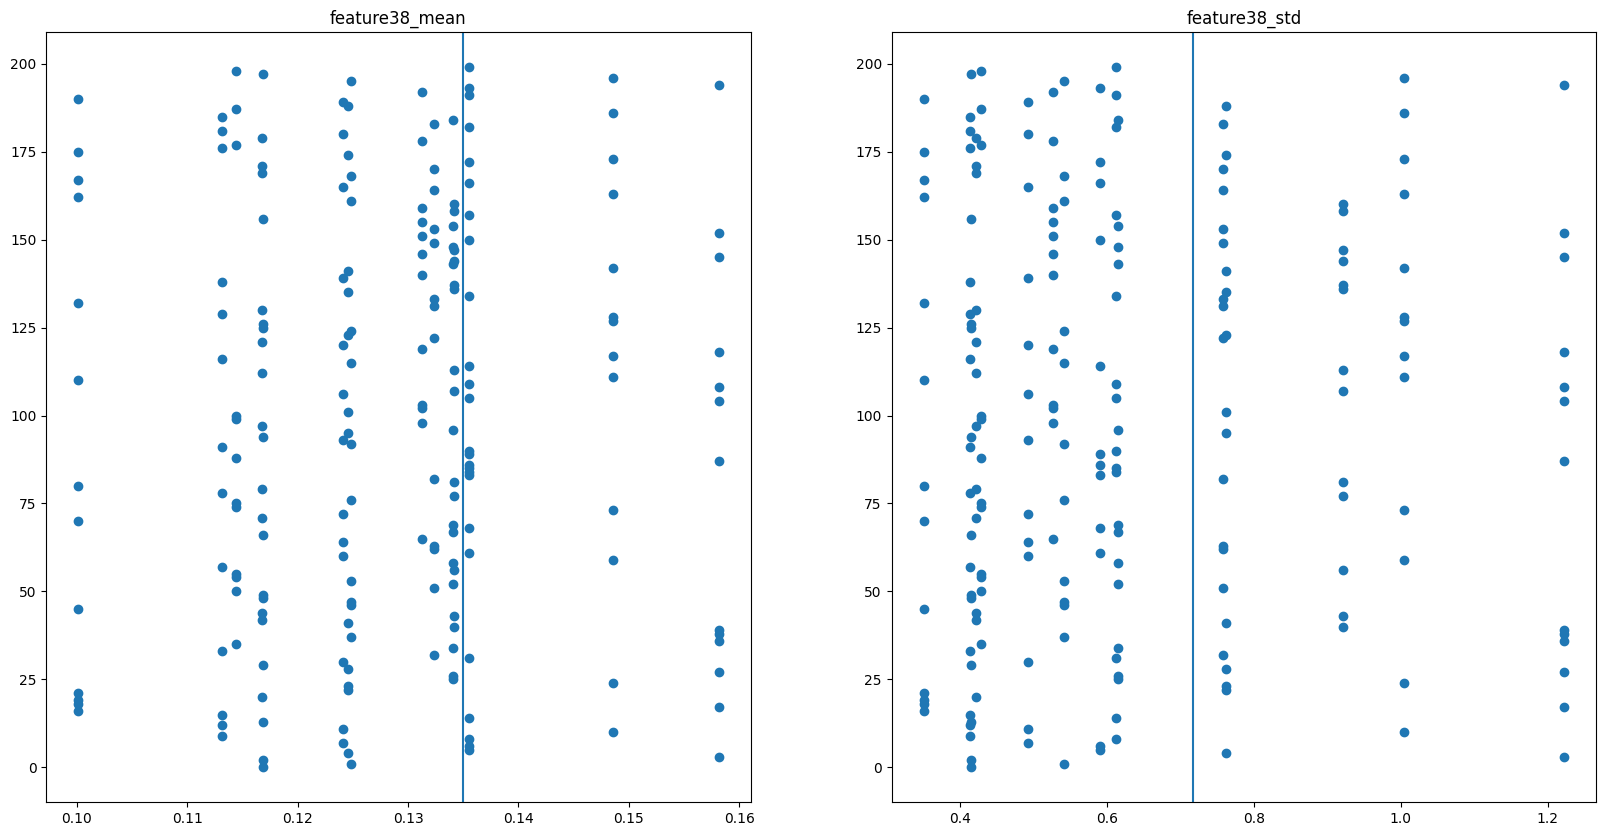

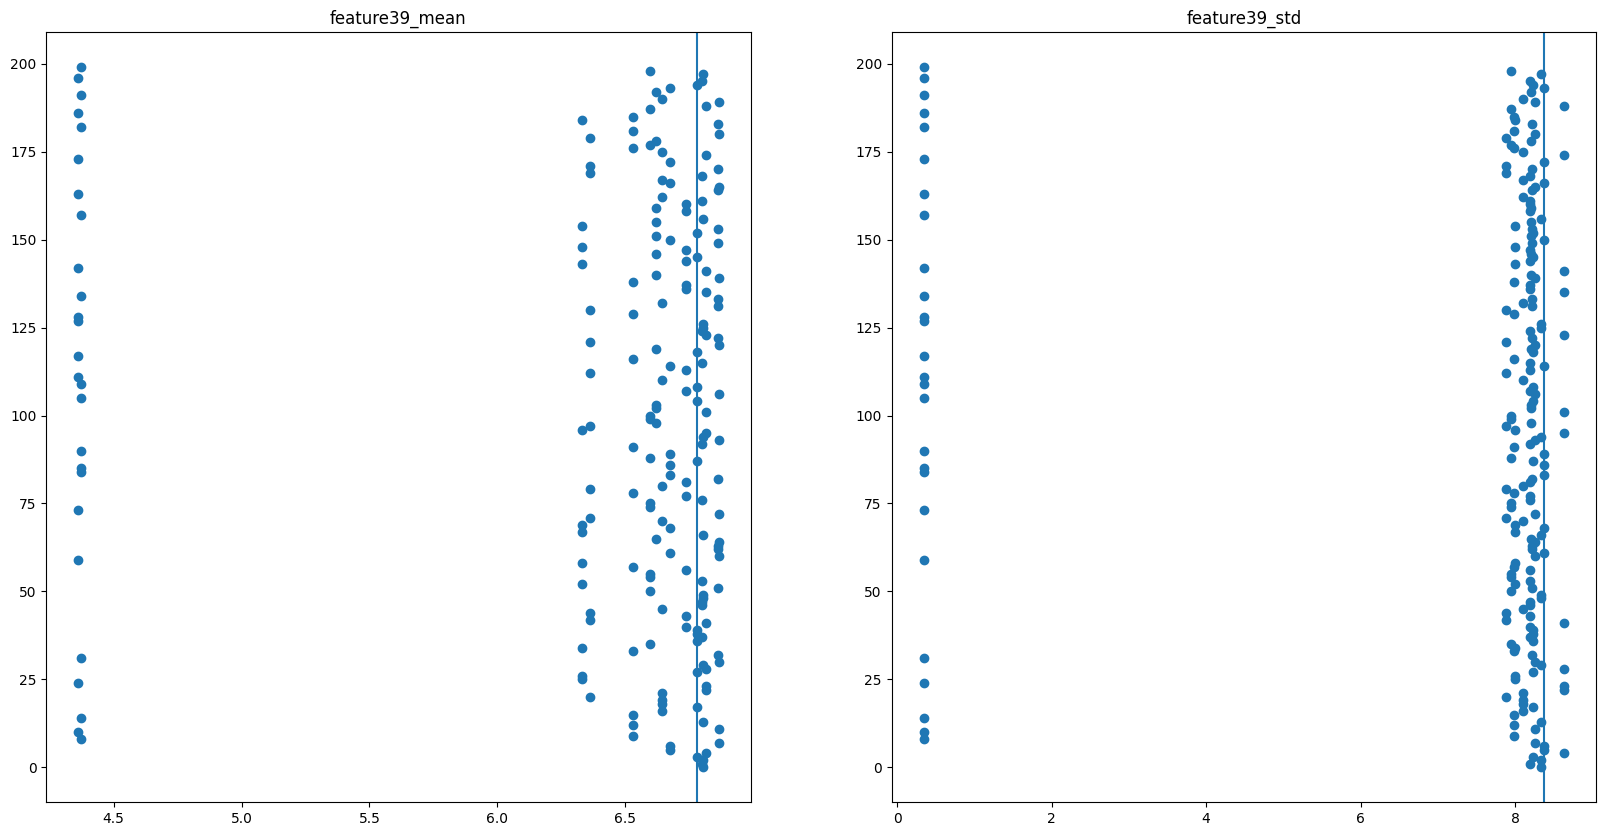

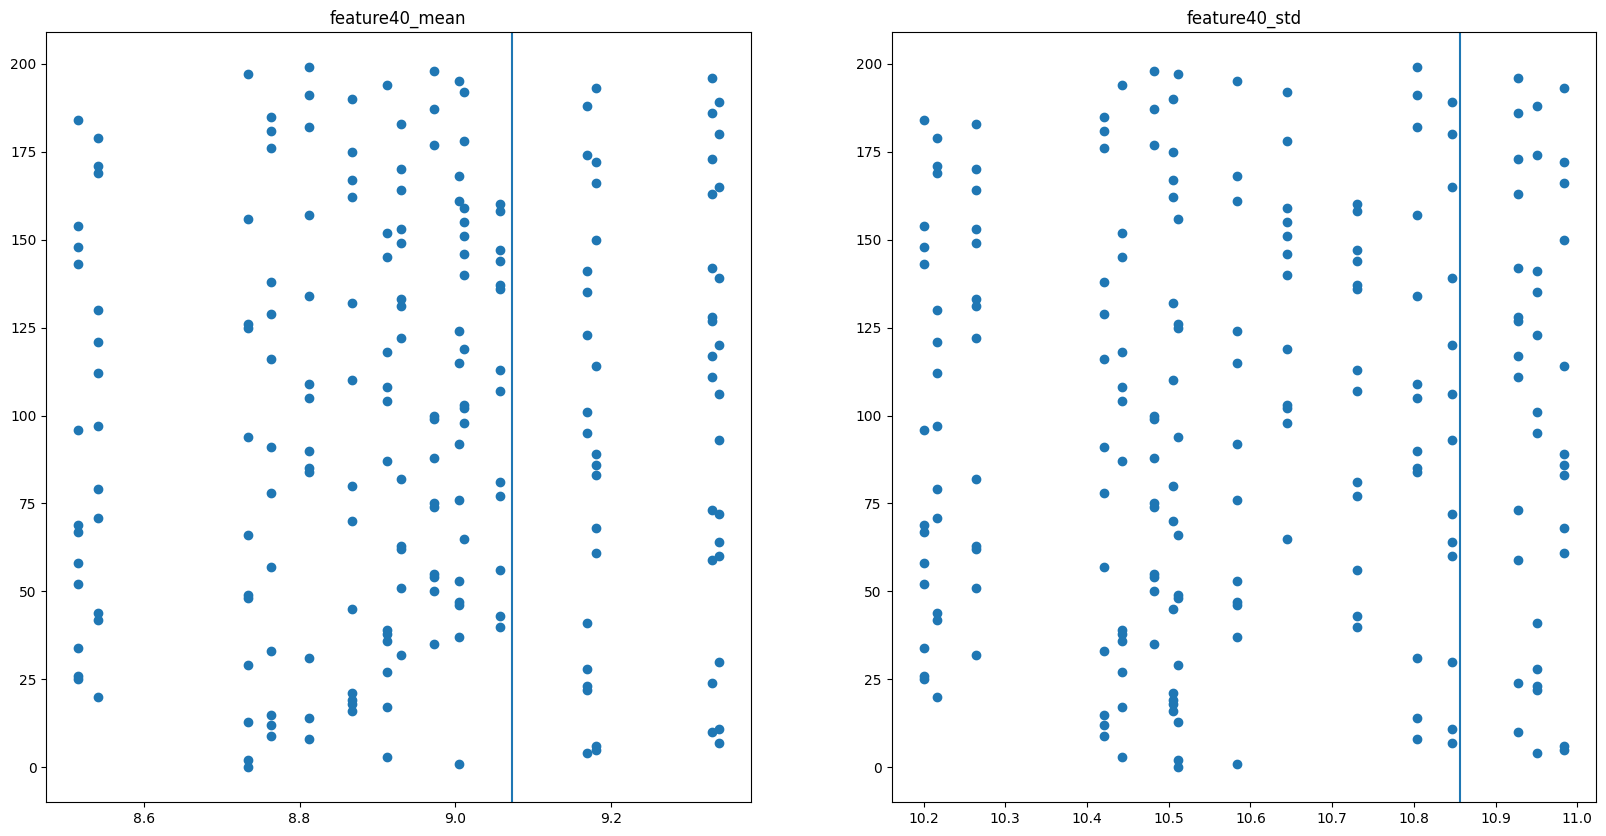

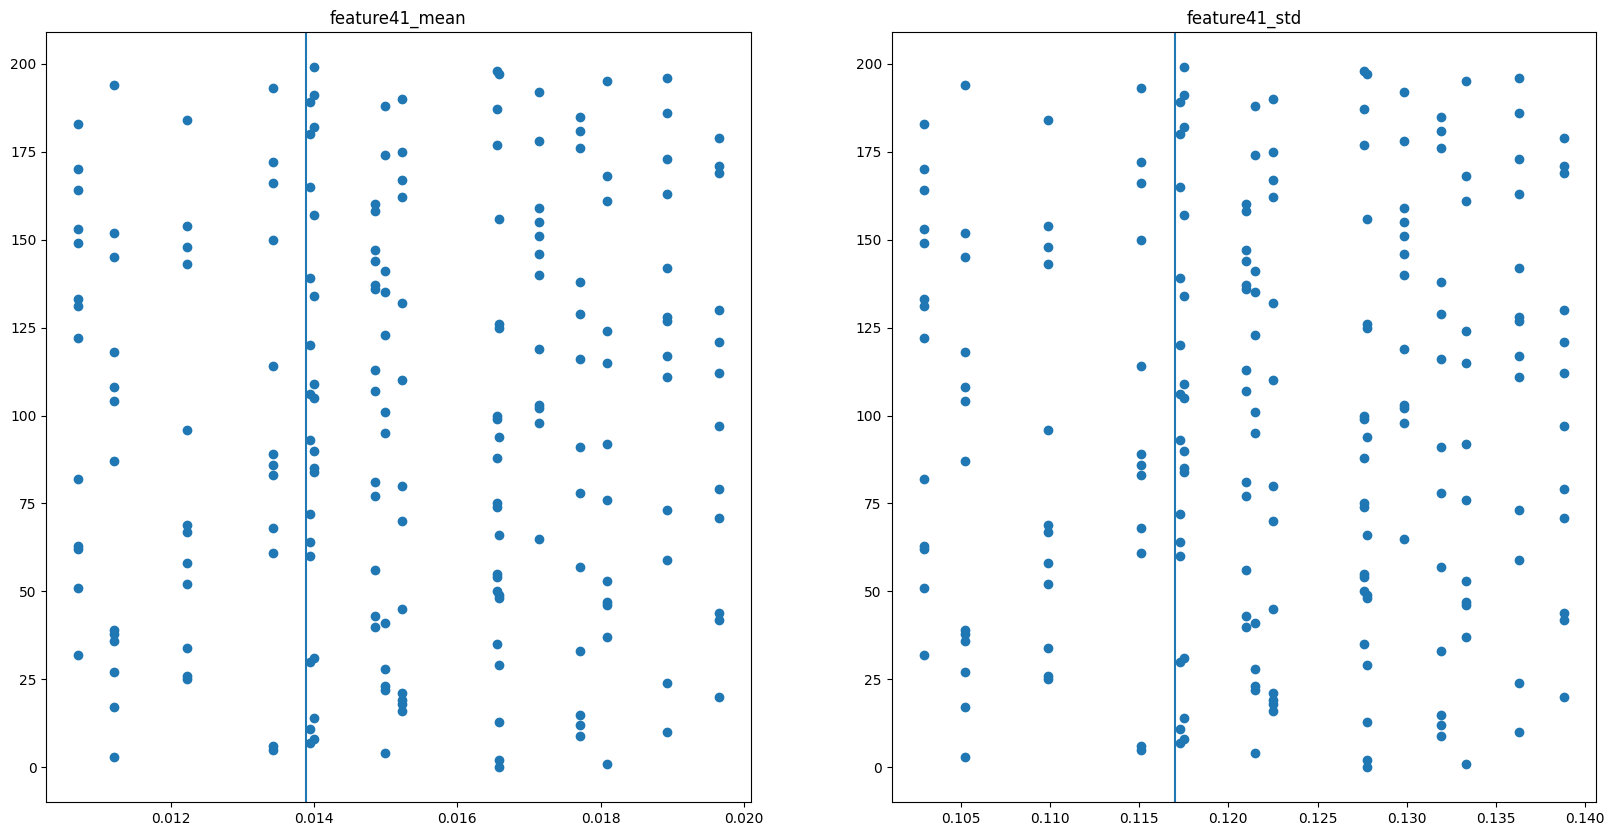

In [11]:
for col in check_drift.keys():
    stats = check_drift[col]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.scatter(x=stats['mean_'],y=stats.index)
    ax1.set_title(f'{col}_mean')
    ax1.axvline(x=train_df[col].mean())

    ax2.scatter(x=stats['std_'],y=stats.index)
    ax2.set_title(f'{col}_std')
    ax2.axvline(x=train_df[col].std())
    plt.show()

In [13]:
train_df['feature2'].value_counts(dropna=False)

tcp       29587
udp       22189
unas       3754
arp         888
ospf        802
          ...  
idrp         22
isis         22
netblt       22
igmp          5
icmp          3
Name: feature2, Length: 132, dtype: int64

In [14]:
dfs[0]['feature2'].value_counts(dropna=False)

tcp            469
udp            366
unas            65
ospf            12
arp             12
sctp             9
rsvp             5
sat-mon          3
sep              3
xnet             2
compaq-peer      2
idpr             2
ifmp             2
any              2
netblt           2
pup              2
qnx              2
ipv6-opts        2
mtp              2
tlsp             2
ddx              2
snp              2
gre              2
nvp              2
rvd              1
igmp             1
srp              1
st2              1
pgm              1
emcon            1
wsn              1
trunk-2          1
ipv6             1
dgp              1
vines            1
ipcv             1
ipv6-route       1
3pc              1
scps             1
cphb             1
pipe             1
ipip             1
etherip          1
wb-mon           1
il               1
idpr-cmtp        1
mux              1
stp              1
pvp              1
tp++             1
Name: feature2, dtype: int64